In [0]:
#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import svm
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from scipy.stats import randint as sp_randint

In [0]:
#Read the CSV file into pandas dataframe
df = pd.read_csv("concrete.csv")

In [0]:
#Check if the data is read successfully
df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [0]:
df.shape

(1030, 9)

In [0]:
#There are 9 columns in the dataframe and 1030 records. As per breadth vs depth analysis, the count of records seems to be fine.
#The data is in raw form and not scaled.
#Out of the 9 columns, 8 of them are the features and "strength" is the target variable.
#The target variable is to be predicted using regression algorithms.

### DELIVERABLE 1

### Univariate Analysis

In [0]:
#Check the data types of the columns.
#df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [0]:
# All the columns are numerical in nature (int64 and float64 datatypes).

In [0]:
# Get the central values, range of values, quartiles, standard deviations of the attributes using describe() function.
df.describe().transpose()

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

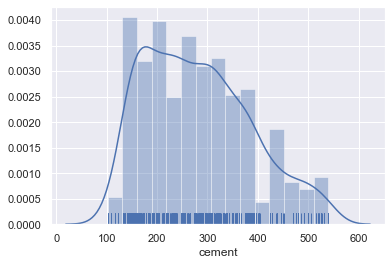

In [0]:
sns.distplot(df['cement'], rug=True)

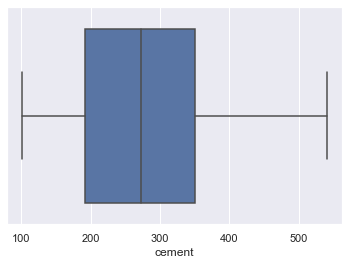

In [0]:
sns.boxplot(df['cement'])

In [0]:
# "cement" feature
# The feature plot is distributed normally with a little skewness towards the right tail.
# No outlier seems to exist.
# Range of values [102, 540] measured in kg in a m3 mixture.
# Mean and median differ by 8
# Standard deviation of 104.5
# Difference between min. to 1st quartile and 3rd quartile to max. comes out to be 100

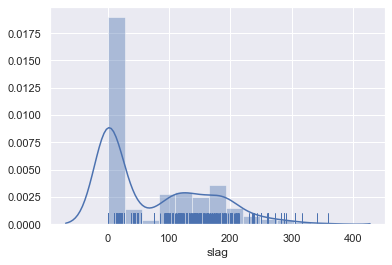

In [0]:
sns.distplot(df['slag'], rug=True)

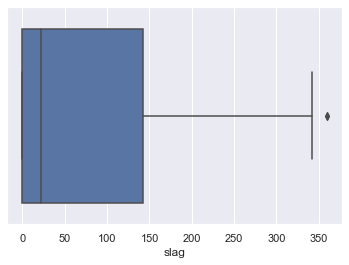

In [0]:
sns.boxplot(df['slag'])

In [0]:
# "slag" feature
# The feature plot is not distributed normally with 2 little clusters of data formed and a little skewness towards the right tail.
# The first peak is formed on the value of 0, indicating many records are either not using slag as an ingredient or the values are missing values.
# A long tail is formed on the right, indicating few outliers.
# Range of values [0, 359.4] measured in kg in a m3 mixture.
# Mean and median differ by 51
# Standard deviation of 86

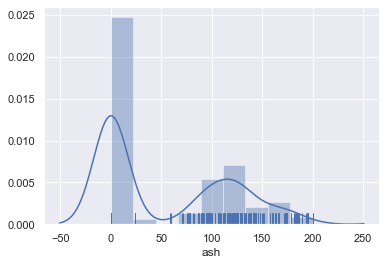

In [0]:
sns.distplot(df['ash'], rug=True)

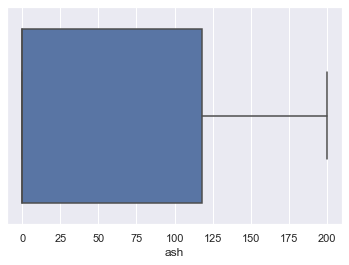

In [0]:
sns.boxplot(df['ash'])

In [0]:
# "ash" feature
# The feature plot is not distributed normally with 2 separate gaussians/clusters formed.
# The first peak is formed on the value of 0, indicating many records are either not using ash as an ingredient or the values are missing values.
# Range of values [0, 200] measured in kg in a m3 mixture.
# Mean and median differ by 54
# Standard deviation of 64

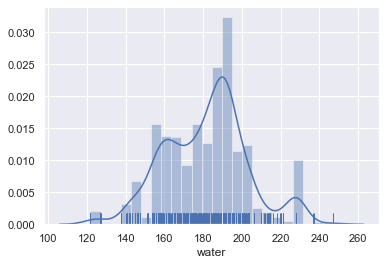

In [0]:
sns.distplot(df['water'], rug=True)

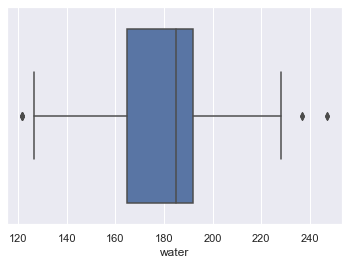

In [0]:
sns.boxplot(df['water'])

In [0]:
# "water" feature
# The feature plot is having a distribution close to normal. 2 little peaks are being formed.
# Few outliers seem to exist on both left and right tails.
# Range of values [122, 247] measured in kg in a m3 mixture.
# Mean and median differ by 4
# Standard deviation of 21
# Difference between min. to 1st quartile and 3rd quartile to max. comes out to be 12.

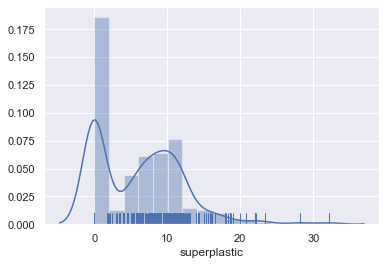

In [0]:
sns.distplot(df['superplastic'], rug=True)

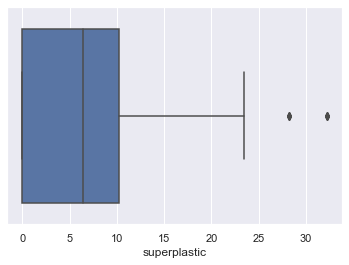

In [0]:
sns.boxplot(df['superplastic'])

In [0]:
# "superplastic" feature
# The feature plot is not having a normal distribution. 2 peaks are being formed.
# The first peak is formed on the value of 0, indicating many records are either not using superplastic as an ingredient or the values are missing values.
# Few outliers seem to exist on the right tail.
# Range of values [0, 32] measured in kg in a m3 mixture.
# Mean and median are almost same.
# Standard deviation of 6.

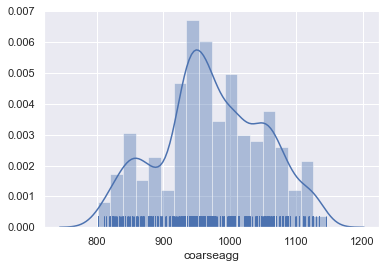

In [0]:
sns.distplot(df['coarseagg'], rug=True)

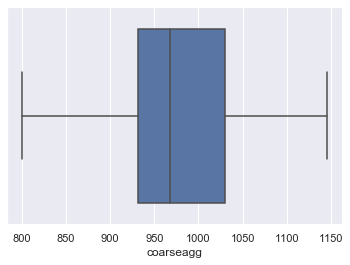

In [0]:
sns.boxplot(df['coarseagg'])

In [0]:
# "coarseagg" feature
# The feature plot is having a distribution close to normal.
# Range of values [801, 1145] measured in kg in a m3 mixture.
# Mean and median differ by 5.
# Standard deviation of 78.
# Difference between min. to 1st quartile and 3rd quartile to max. comes out to be 15.

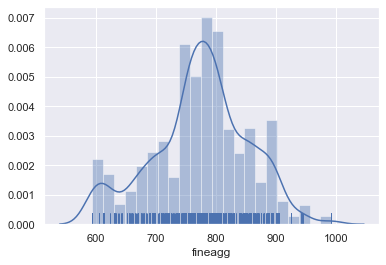

In [0]:
sns.distplot(df['fineagg'], rug=True)

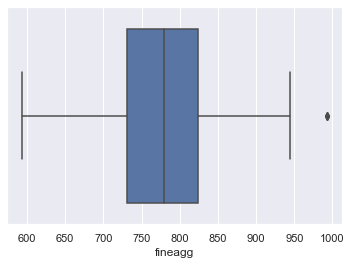

In [0]:
sns.boxplot(df['fineagg'])

In [0]:
# "fineagg" feature
# The feature plot is having a distribution close to normal with a little tail on the right.
# Few outliers seem to exist on the right side.
# Range of values [594, 992] measured in kg in a m3 mixture.
# Mean and median differ by 6.
# Standard deviation of 80.
# Difference between min. to 1st quartile and 3rd quartile to max. comes out to be 32.

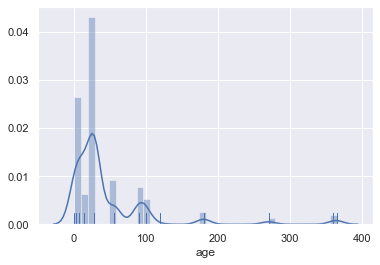

In [0]:
sns.distplot(df['age'], rug=True)

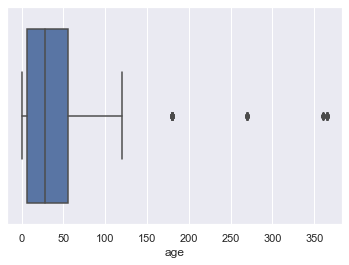

In [0]:
sns.boxplot(df['age'])

In [0]:
# "age" feature
# The feature plot is having a long tail on the right.
# This indicates many records are having values between 0 and 100 and other varied values more than 100 till 365.
# Varied values on the right tail indicate outliers.
# Range of values [1, 365] in days.
# Mean and median differ by 16.
# Standard deviation of 63.

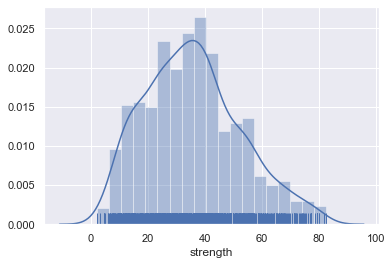

In [0]:
sns.distplot(df['strength'], rug=True)

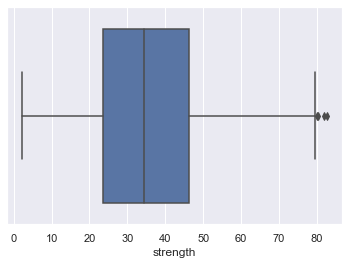

In [0]:
sns.boxplot(df['strength'])

In [0]:
# Target column "strength"
# It is a normal distribution.

### Missing values or Data pollution

In [0]:
# Check for missing values
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [0]:
# No empty or missing values found above.

In [0]:
# Check for data pollution
(df == "?").sum()

C:\Users\Sudhir\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [0]:
(df == " ").sum() + (df == "").sum() + (df == "-").sum() + (df == "_").sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [0]:
(df == np.NaN).sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [0]:
# No data pollution found. The data exists without any missing values or data pollution.

## Multivariate Analysis

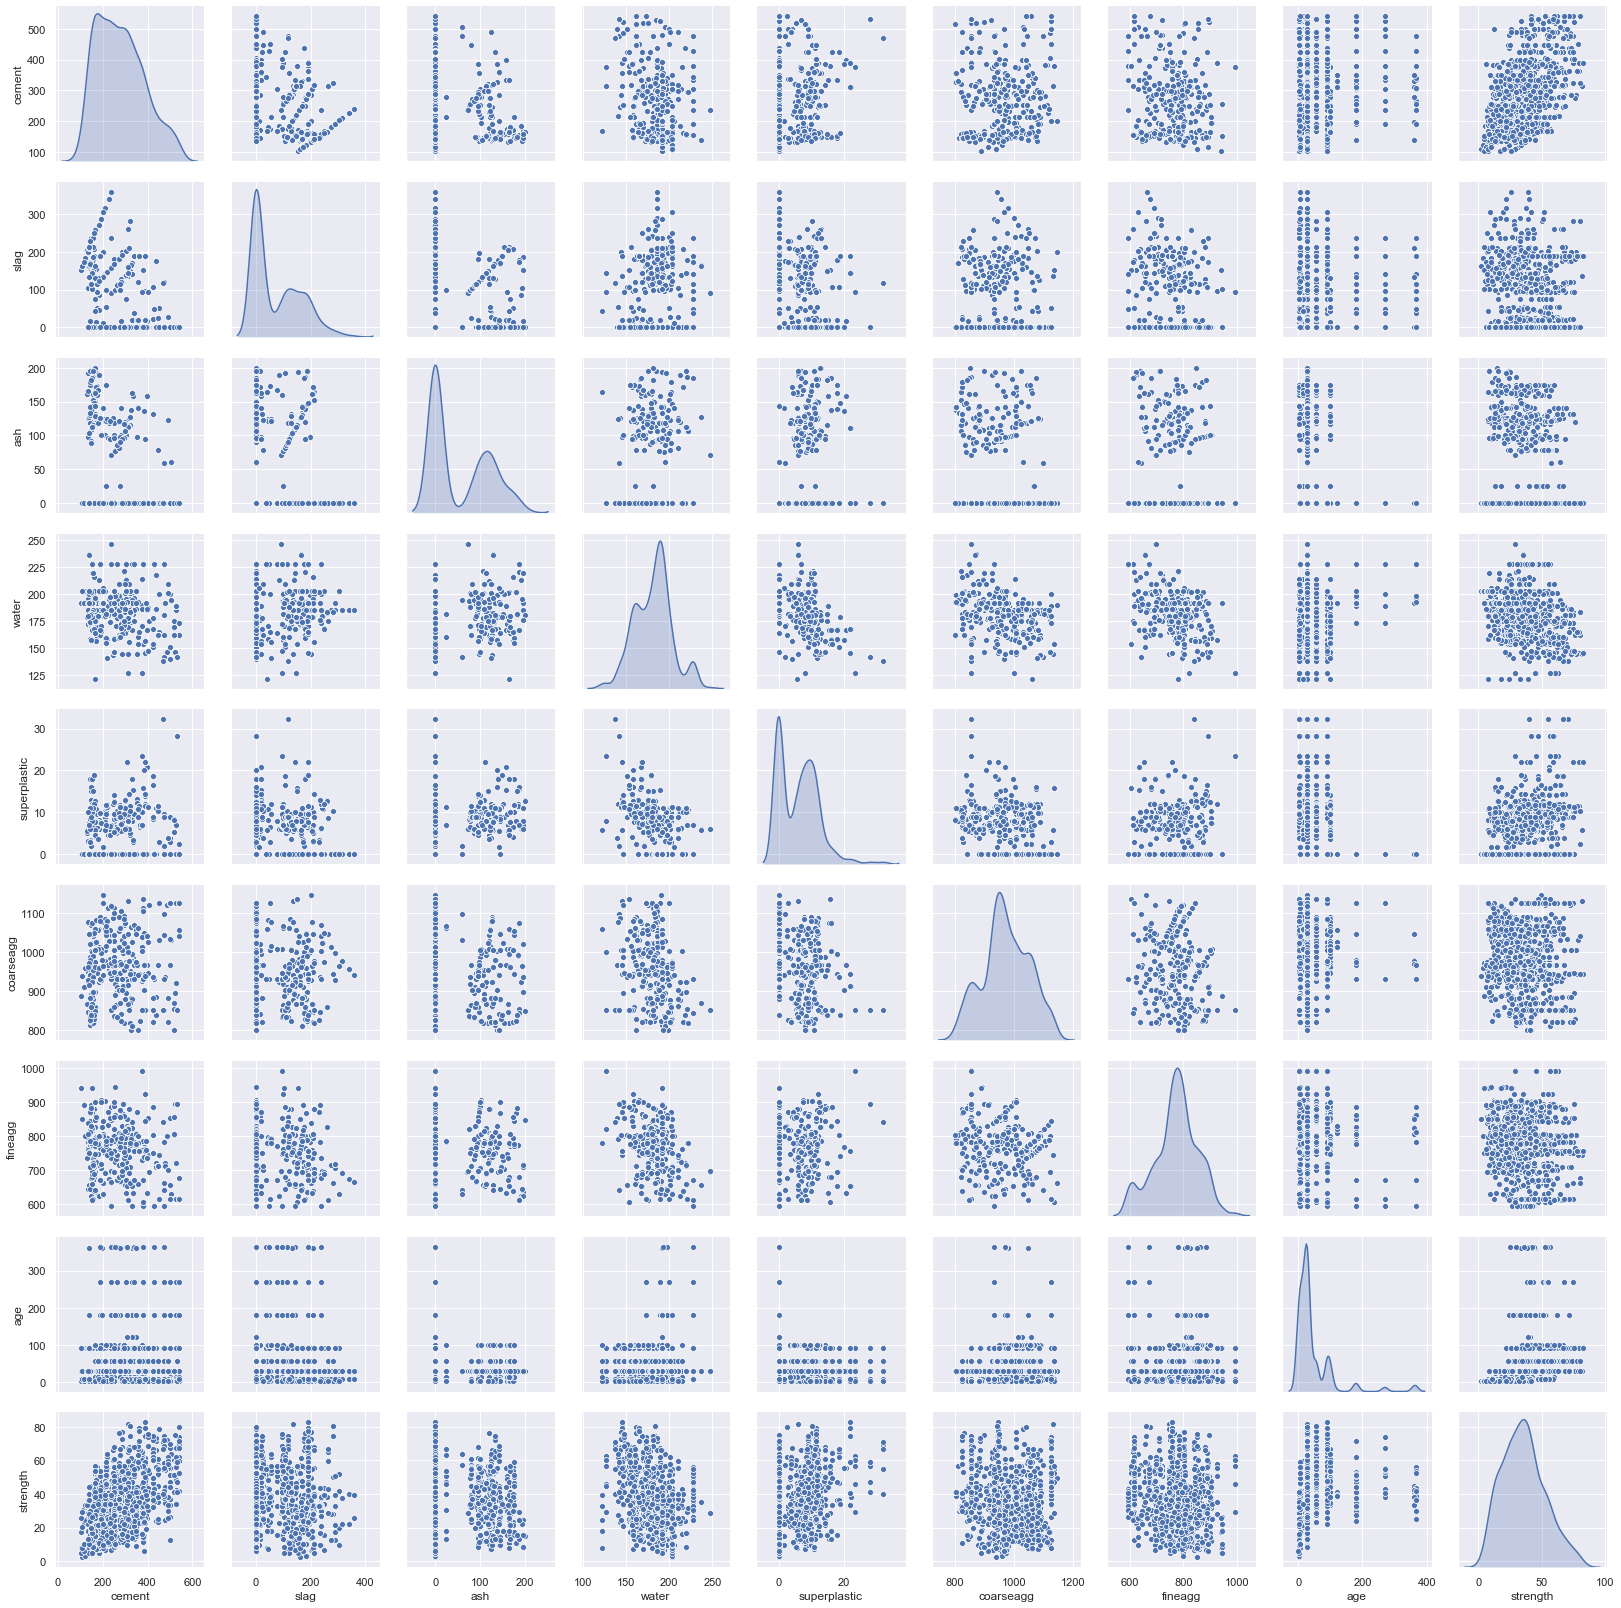

In [0]:
# Pair Plot Analysis to check relations among different independent features and between target variable and the features.
# Order the importance of different features respective to the target variable.
# Check if there are clusters in the dimensions.
# Compare diagonal plots with the univariate analysis done.
sns.pairplot(df, diag_kind='kde') #density curve instead of histogram

In [0]:
# Analyzing the diagonal plots first.

In [0]:
# As analyzed in the univariate analysis, the dimensions are having varied distributions.
# The target variable 'strength' is having a close to normal distribution.
# Of the independent features, many dimensions seem to have a mix of gaussians. Clusters are likely to exist.
# Close to normal distribution curves on 'cement', 'water', 'coarseagg', 'fineagg', and the target variable 'strength'.
# Small peaks occur on 'water', 'coarseagg', 'fineagg', and 'age' features which indicates very small clusters of data.
# Mix of gaussians detected on 'slag', 'ash' and 'superplastic'.

# Clusters are likely to be hidden in the data set.
# There must be at least 2 clusters in the entire data set, looking at the 'ash' dimension which has 2 gaussians in it.
# 2 being the maximum number of gaussians in a dimension.
# Cluster range could be [2 to 6] in the entire data set.

In [0]:
# Off-diagonal plots analysis

In [0]:
# By looking at all the bivariate scatter plots on the pair panel, there are very likely no strong relationships in any pair of dimensions.
# All these scatter plots are representing more of a cloud formation, which is most probably because of different clusters of data within the data set.

# 'cement' with other independent features:
# No solid relations found.

# 'slag' with other independent features:
# No solid relations found. The data points are scattered like a cloud in most of the plots.
# There are even 2 to 3 lines of data points formed that could be 2 to 3 clusters' relation with the other dimension, slag in this case.

# 'ash' with other independent features:
# No solid relations found.

# 'water' with other independent features:
# No solid relations found.
# A slight vertical group of data points between 'water' and 'coarseagg' features.

# 'superplastic' with other independent features:
# No solid relations found.
# Slight vertical cloud formations between 'superplastic' and 'coarseagg', 'fineagg' features.

# 'coarseagg' with other independent features:
# No solid relations found.

# 'fineagg' with other independent features:
# No solid relations found.

# 'age' with other independent features:
# No solid relations found.

In [0]:
# Relationship between the target variable 'strength' and the independent features.
# All the the relations are weak, looking at the plots except a positive correlation that can be said to exist with the 'cement' feature.
# Right now, the 'cement' feature looks to be the most important dimension to predict the 'strength' variable.

## Test data set performance before clustering

In [0]:
#Handle outliers

In [0]:
#Creating a copy of original dataframe
df2 = df

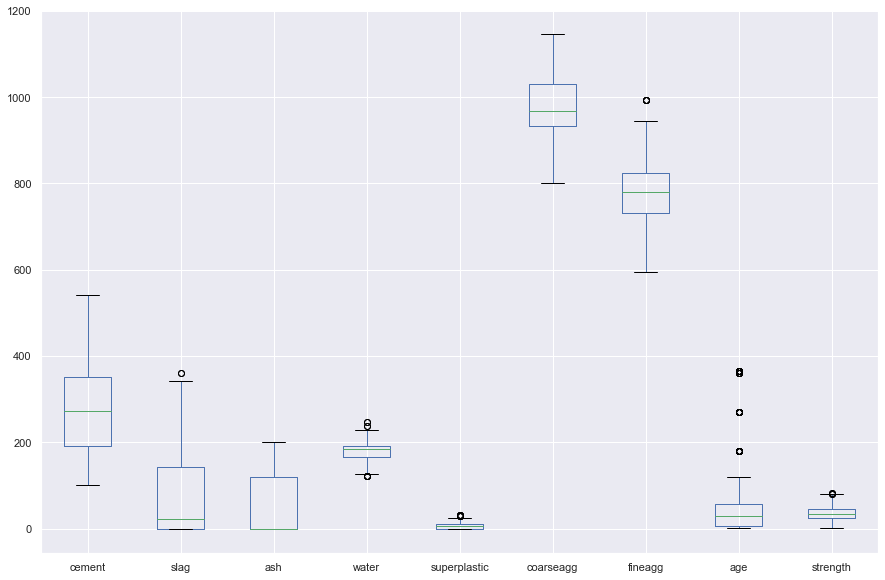

In [0]:
df2.boxplot(figsize=(15, 10))

C:\Users\Sudhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Sudhir\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


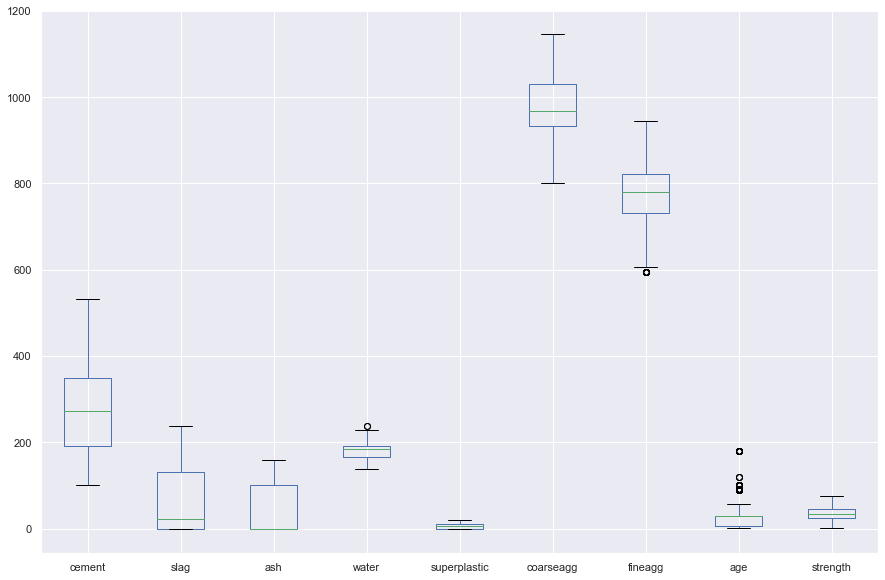

In [0]:
def handle(a):
    median, std = a.median(), a.std()  #Get the median and the standard deviation for each 'a'
    outliers = (a - median).abs() > 2.5*std # Subtract median from every member from each 'a'. Take absolute values > 2.5std
    a[outliers] = a.median()       
    return a

df2new = (df2.transform(handle))
df2new.boxplot(figsize=(15, 10))

In [0]:
# Now 'df2new' is the new dataframe after handling outliers to create and test the performance of regression models on this data set.
# As after outlier handling, 'ash' feature comes out with all the values zeroed. So removing this column.
# df2new.pop('ash')

### Support Vector Machine regression model before clustering

In [0]:
# Build Support Vector Regression model on 'df2new'
#Separate dataframe into independent variables and target variable as X and Y.

df2newScaled = df2new.apply(zscore)

array = df2newScaled.values
X = array[:,:8]
y = array[:,8]

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix) #Covariance matrix for features

[[ 1.00097182 -0.21769478 -0.21538771 -0.07503669  0.00567867 -0.1524453
  -0.2031209   0.02142785]
 [-0.21769478  1.00097182 -0.21768123  0.09159478  0.08292212 -0.33245387
  -0.17459131 -0.02689337]
 [-0.21538771 -0.21768123  1.00097182 -0.21827398  0.43146314 -0.05065477
   0.12207105 -0.04680449]
 [-0.07503669  0.09159478 -0.21827398  1.00097182 -0.63258379 -0.1864391
  -0.43698847  0.09967955]
 [ 0.00567867  0.08292212  0.43146314 -0.63258379  1.00097182 -0.20338685
   0.1768172  -0.07166188]
 [-0.1524453  -0.33245387 -0.05065477 -0.1864391  -0.20338685  1.00097182
  -0.16153401  0.02344236]
 [-0.2031209  -0.17459131  0.12207105 -0.43698847  0.1768172  -0.16153401
   1.00097182 -0.02395555]
 [ 0.02142785 -0.02689337 -0.04680449  0.09967955 -0.07166188  0.02344236
  -0.02395555  1.00097182]]


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
model1 = svm.SVR()
model1.fit(X_train , y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred = model1.predict(X_test)

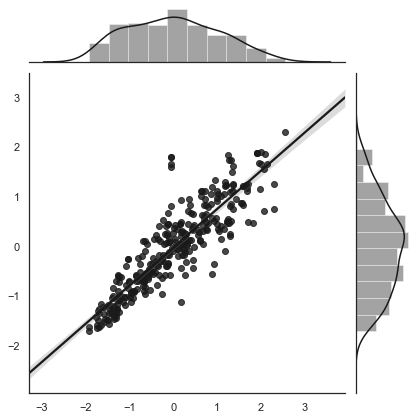

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k");

In [0]:
model1.score(X_test, y_test)

0.782628116213679

In [0]:
# Getting the above accuracy for the SVR algorithm without clustering.

## Testing models on different clusters

In [0]:
# Creating a copy of original dataframe
df3 = df

## K-Means Clustering

In [0]:
cluster_range = range( 2, 6 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(df3)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

num_clusters  cluster_errors
0             2    2.600674e+07
1             3    2.129049e+07
2             4    1.849828e+07
3             5    1.664900e+07

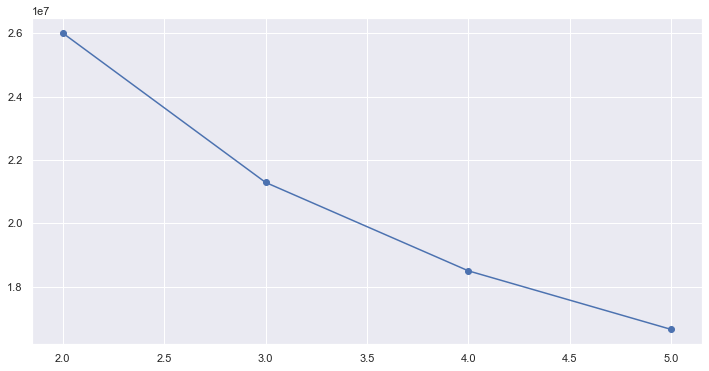

In [0]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [0]:
distortions = []
K = range(2,6) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(df3)
      
    distortions.append(sum(np.min(cdist(df3, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / df3.shape[0])

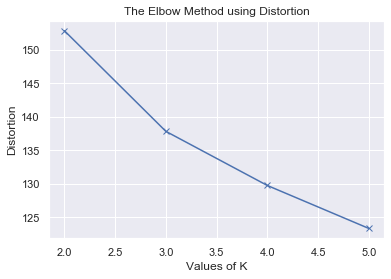

In [0]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [0]:
# As shown in the elbow plot, there are likely to be 3 good clusters.
# So, taking 3 clusters into consideration, there would be 3 models.

In [0]:
df3z = df3.apply(zscore)

In [0]:
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(df3z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2354, tol=0.0001, verbose=0)

In [0]:
prediction=cluster.predict(df3z)
df3z["cluster"] = prediction

In [0]:
df3z.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.353800  1.960709 -0.748166  1.055292     -1.119260  -0.014398 -0.305676   
1 -1.082123 -0.283757  1.484068 -1.178822      0.970301   1.388141  0.300692   
2 -0.283824 -0.841569  0.970456  0.259513     -0.055132  -0.206121  1.126981   
3 -0.126330  0.665316 -0.748166  2.266262     -1.119260  -0.526517 -1.303578   
4 -1.220914  1.582666 -0.748166  0.551134      0.641389   0.958372 -0.964165   

        age  strength  cluster  
0 -0.223767 -0.331585        1  
1 -0.610851 -0.735492        0  
2 -0.223767 -0.374001        0  
3 -0.223767  0.678817        1  
4 -0.223767 -1.065962        1

In [0]:
centroids = cluster.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df3.columns) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.596474 -0.318015  0.928333 -0.323256      0.577330   0.129703  0.285333   
1  0.015815  0.001761 -0.724598  0.716658     -0.970490   0.225578 -0.298794   
2  1.034584  0.564814 -0.223189 -0.842373      0.891298  -0.678763  0.082156   

        age  strength  
0 -0.030369 -0.179866  
1  0.068935 -0.363890  
2 -0.082323  1.042468

### Now analyzing, handling outliers and doing feature engineering on each cluster one by one.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259F5BF01C8>,
      dtype=object)

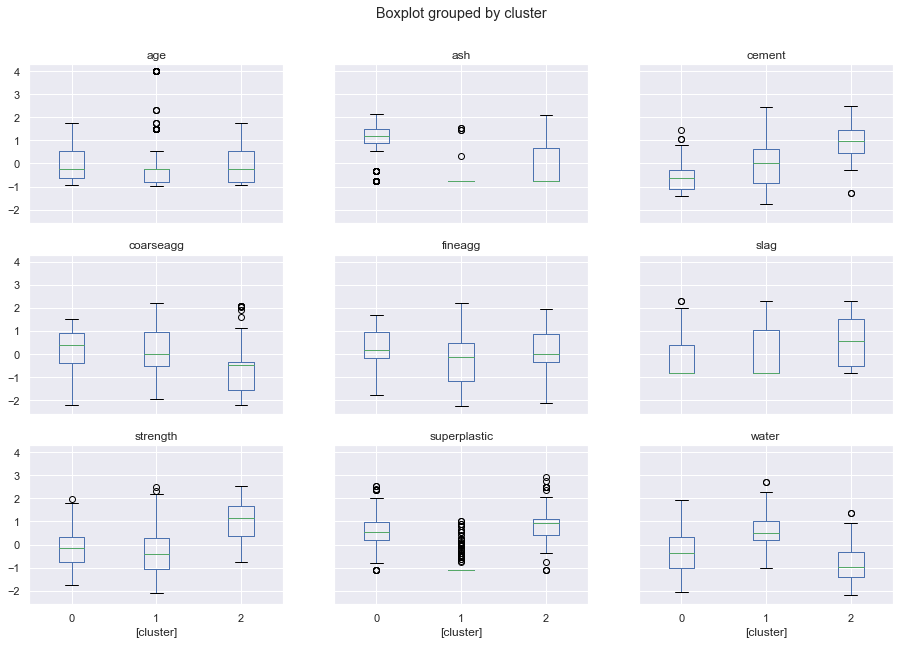

In [0]:
df3z.boxplot(by = 'cluster', figsize=(15, 10))

In [0]:
# There are many outliers for many clusters.
# Will handle them cluster by cluster as outliers are not similar for every cluster.

In [0]:
# Analyze target variable with other dimensions one by one, grouped by 'cluster'.

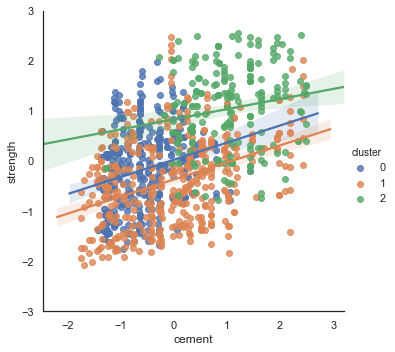

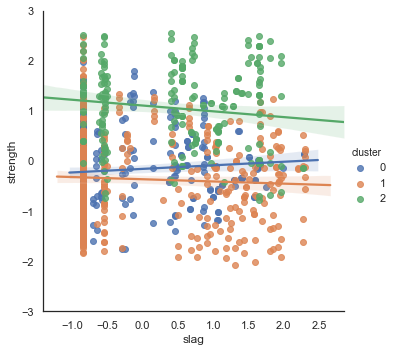

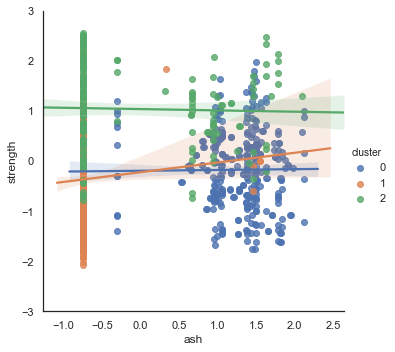

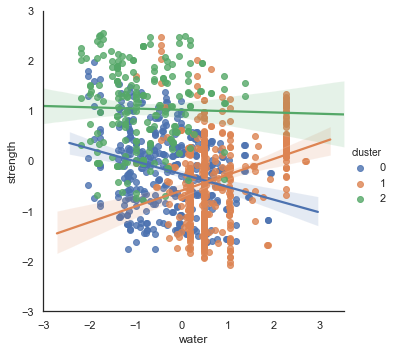

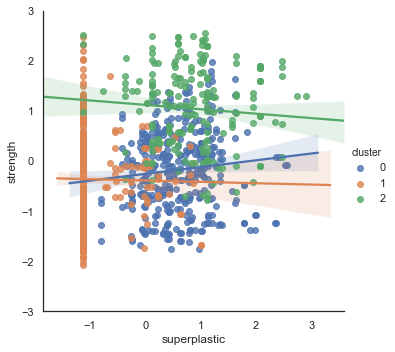

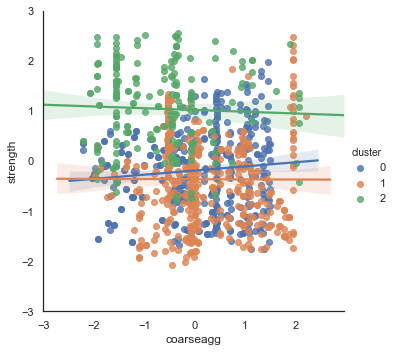

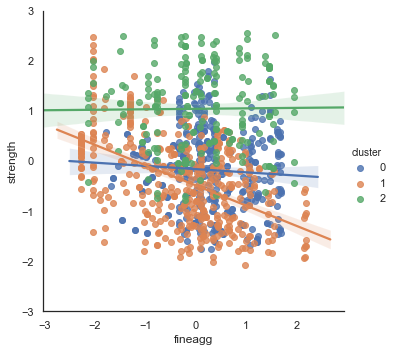

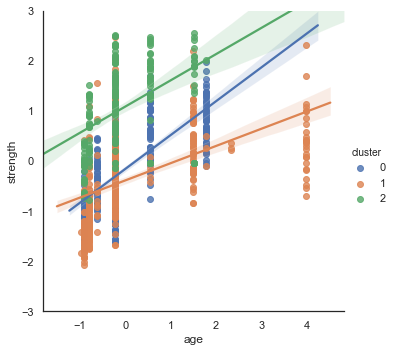

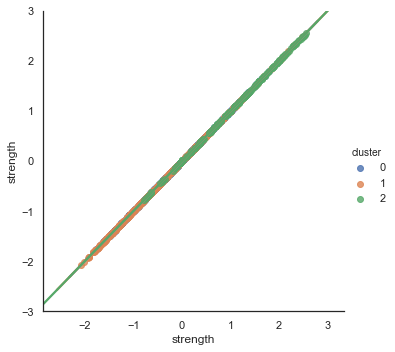

In [0]:
for dimension in df.columns:
    with sns.axes_style("white"):
        plot = sns.lmplot(dimension,'strength',data=df3z,hue='cluster')
    plot.set(ylim = (-3,3))

In [0]:
# For Cluster 0,
# Good predictors could be cement, water, superplastic (not much), age.
# Bad predictors being slag, ash, coarseagg, fineagg.

# For Cluster 1,
# Good predictors could be cement, ash, water, fineagg, age.
# Bad predictors being slag, superplastic, coarseagg.

# For Cluster 2,
# Good predictors could be cement, slag, superplastic, age.
# Bad predictors being ash, water, coarseagg, fineagg.

# The above inferences would be used to drop columns while structuring clusters.

In [0]:
cl0df = df3z[df3z['cluster'] == 0]
cl0df = cl0df.drop('cluster', axis=1)

cl1df = df3z[df3z['cluster'] == 1]
cl1df = cl1df.drop('cluster', axis=1)

cl2df = df3z[df3z['cluster'] == 2]
cl2df = cl2df.drop('cluster', axis=1)

## Cluster 0 Pair panel

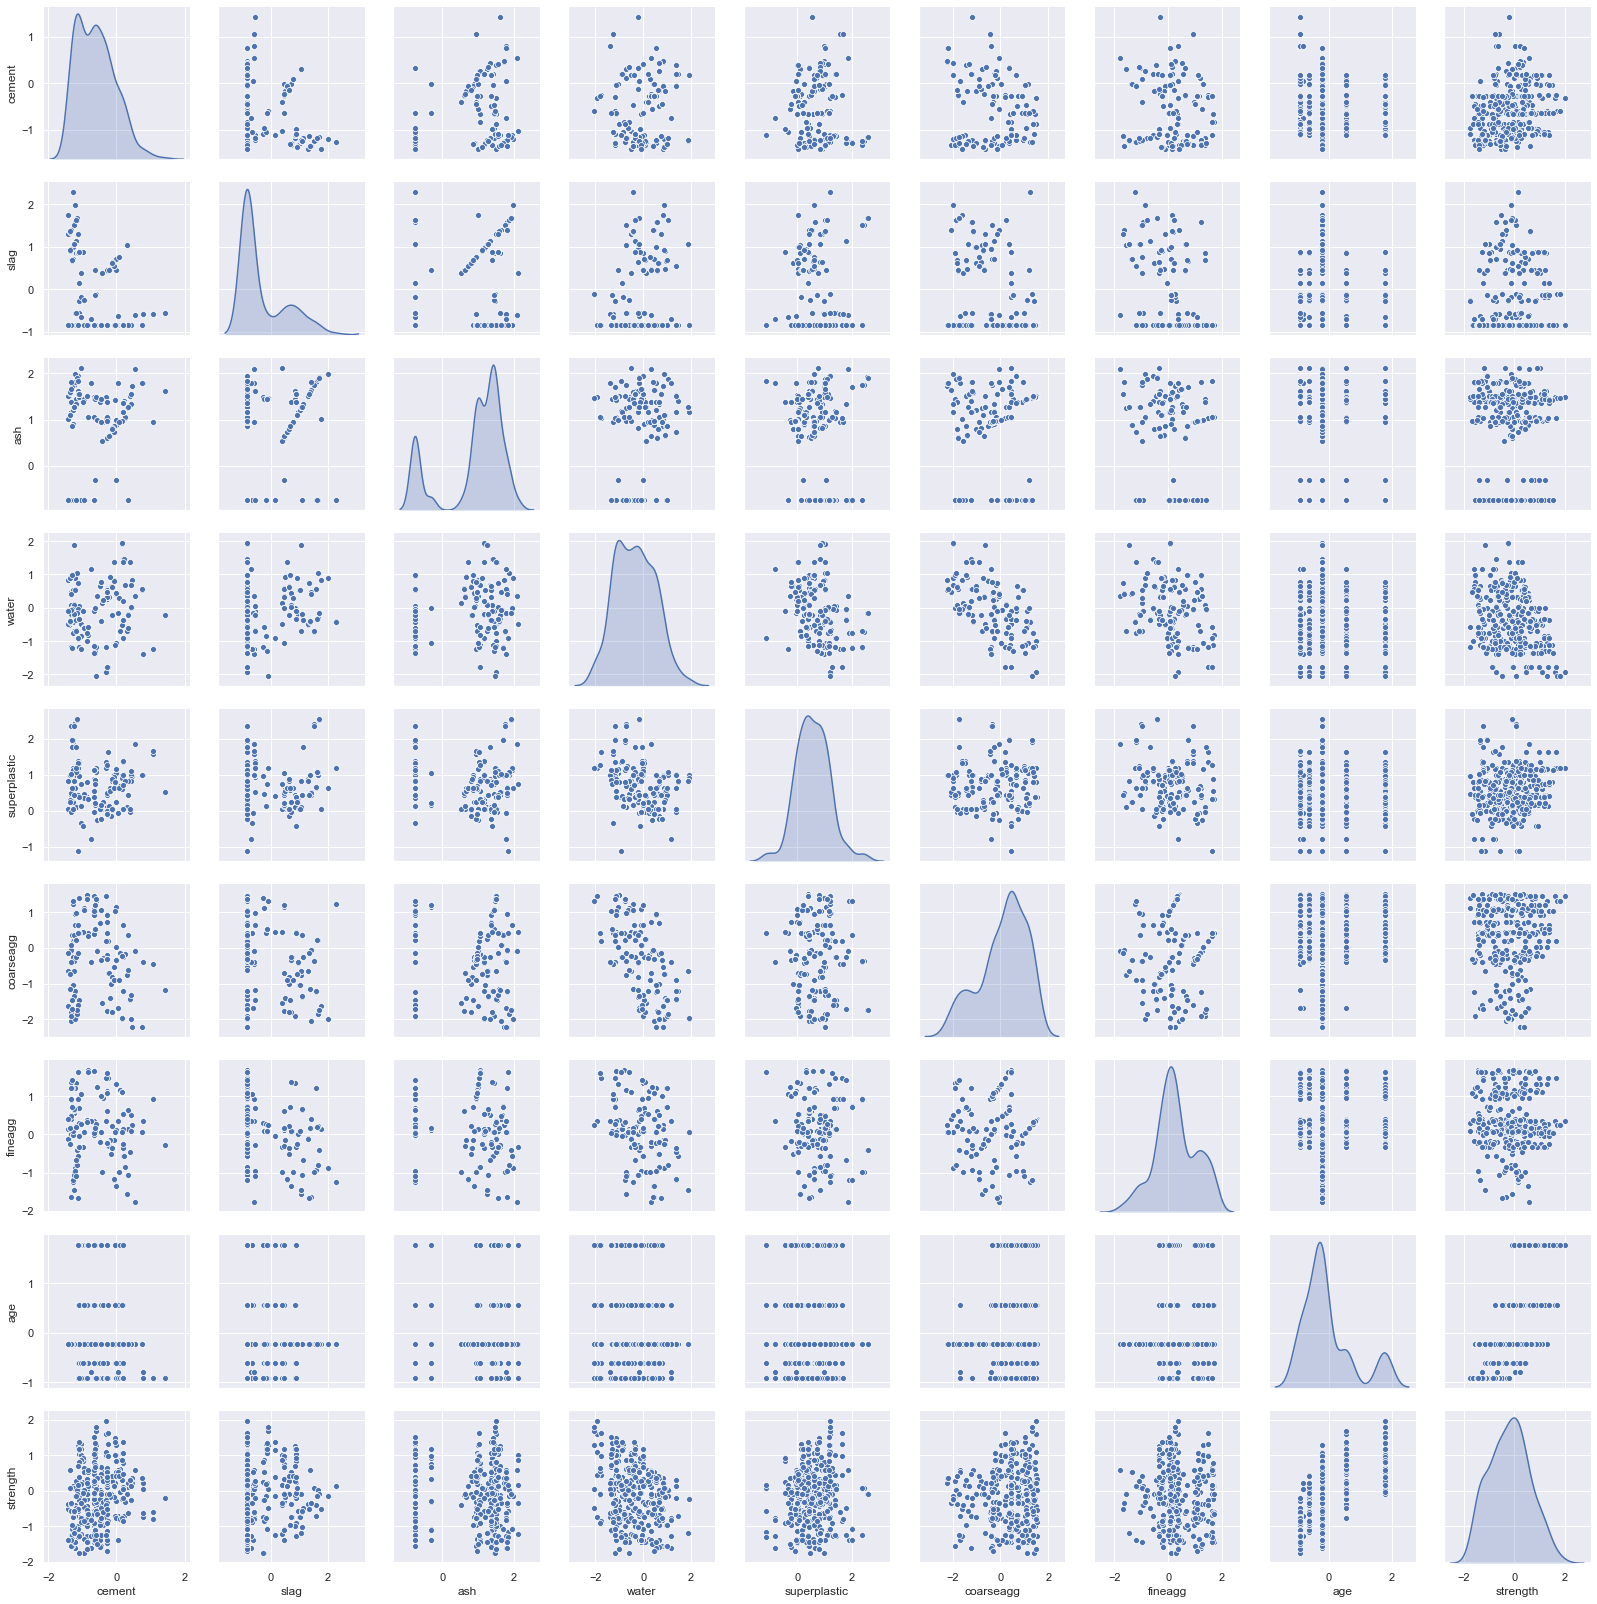

In [0]:
sns.pairplot(cl0df, diag_kind='kde')

In [0]:
# Now the curve distribution for most features are close to normal, thus, improved from the original data set.

In [0]:
# Handle the outliers. For this, once again plot the boxplot for this cluster.

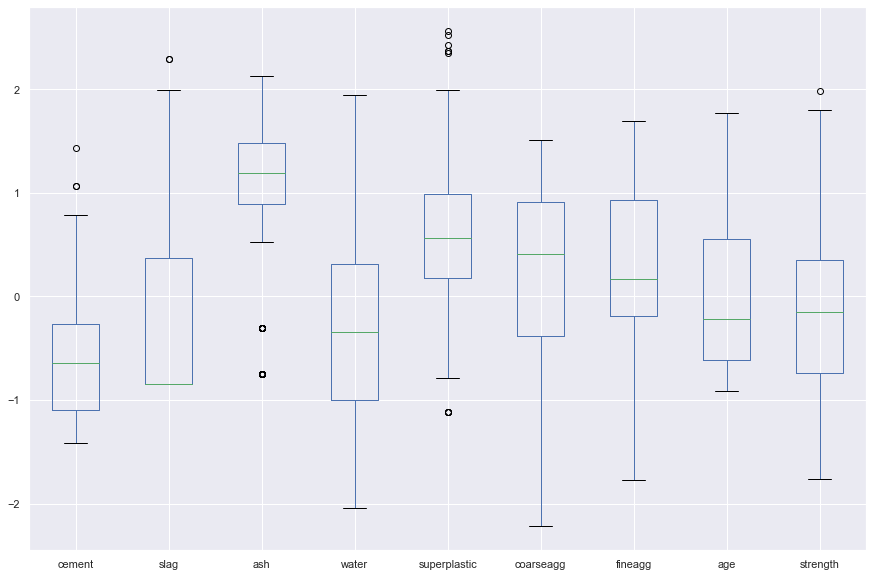

In [0]:
cl0df.boxplot(figsize=(15,10))

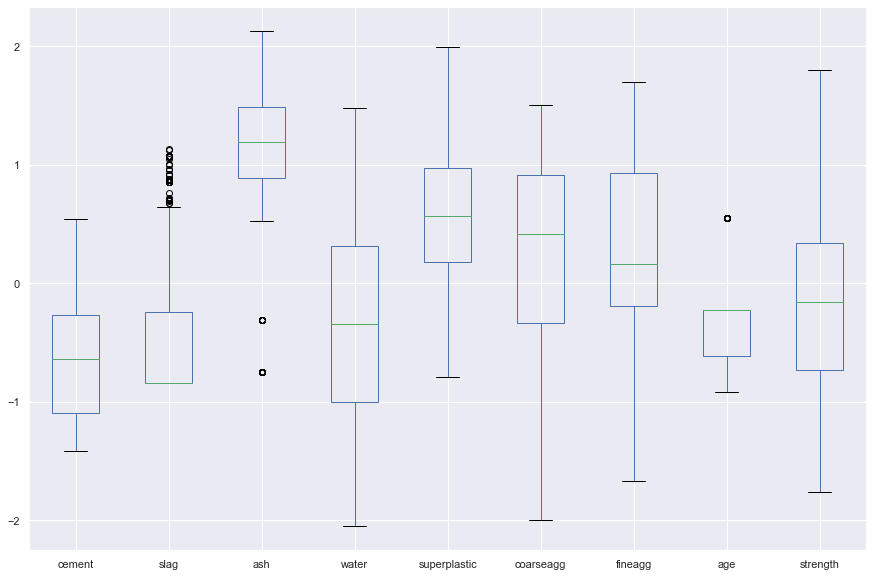

In [0]:
def handle(a):
    median, std = a.median(), a.std()  #Get the median and the standard deviation for each 'a'
    outliers = (a - median).abs() > 2.5*std # Subtract median from every member from each 'a'. Take absolute values > 2.5std
    a[outliers] = a.median()       
    return a

cl0df1 = cl0df.transform(handle)
cl0df1.boxplot(figsize=(15, 10))

In [0]:
cl0df1.shape

(386, 9)

In [0]:
# Feature engineering on cluster 0.

In [0]:
# Drop unimportant columns.
cols_to_drop = ["slag", "ash", "coarseagg" , "fineagg"]
cl0df2 = cl0df1.drop(cols_to_drop , axis = 1)

In [0]:
cl0df2.head()

cement     water  superplastic       age  strength
1  -1.082123 -1.178822      0.970301 -0.610851 -0.735492
2  -0.283824  0.259513     -0.055132 -0.223767 -0.374001
7  -0.270043  0.313883      0.118998  0.550399  0.095747
9  -1.218946  0.585733      0.622041 -0.223767 -0.388562
10 -1.250445 -0.724091      0.563997 -0.223767  0.077387

In [0]:
X = cl0df2.drop('strength', axis=1)
y = cl0df2['strength']

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 0.24448227  0.03572461 -0.00341837 -0.00328682]
 [ 0.03572461  0.63216115 -0.20851035  0.01943454]
 [-0.00341837 -0.20851035  0.27489926 -0.00200096]
 [-0.00328682  0.01943454 -0.00200096  0.16657468]]


In [0]:
# Applying SVR before PCA
X = X.values
y = y.values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
XTrain

array([[-1.25831929, -0.74880469,  1.20247451, -0.22376738],
       [-1.32722299,  0.48687829,  0.42856293, -0.22376738],
       [-1.03684309, -0.8575448 ,  0.13834609, -0.61085059],
       ...,
       [-1.17169749, -0.67960645,  1.24117009, -0.22376738],
       [-0.12436115, -0.21004691,  0.89290988, -0.22376738],
       [-0.26413724,  0.58573293,  0.42856293, -0.22376738]])

In [0]:
svr = svm.SVR()
svr.fit(XTrain, yTrain)
yPred = svr.predict(XTest)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


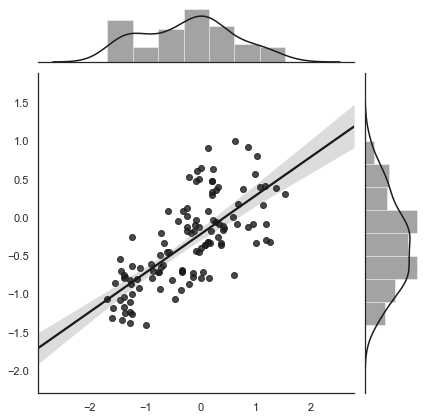

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=yTest, y=yPred, kind="reg", color="k");

In [0]:
svr.score(XTrain, yTrain)

0.6094554492221225

In [0]:
svr.score(XTest, yTest)

0.4934547377344072

In [0]:
# Poor performance for cluster 0 data on SVR before PCA.

In [0]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Eigen values
print(pca.explained_variance_)

[0.7310469  0.24439837 0.18021945 0.16245264]


In [0]:
# Eigen vectors
print(pca.components_)

[[ 0.06926075  0.9065761  -0.41506704  0.03228109]
 [ 0.98163261  0.01144826  0.18543363 -0.04336725]
 [ 0.13811883 -0.36610927 -0.8104958  -0.43587125]
 [ 0.11190865 -0.20964902 -0.36936469  0.89838381]]


In [0]:
# Percentage of variation explained by each eigen vector.
print(pca.explained_variance_ratio_)

[0.55461442 0.18541473 0.13672489 0.12324596]


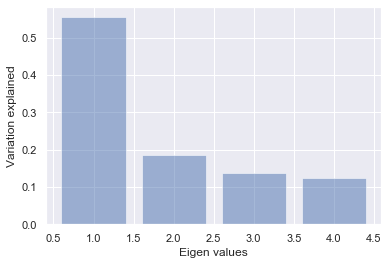

In [0]:
plt.bar(list(range(1,5)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen values')
plt.show()

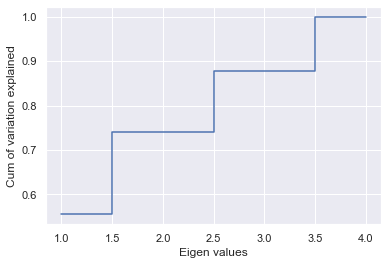

In [0]:
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen values')
plt.show()

In [0]:
pcaNew = PCA(n_components=3)
pcaNew.fit(X)
print(pcaNew.components_)
print(pcaNew.explained_variance_ratio_)
XpcaNew = pcaNew.transform(X)

[[ 0.06926075  0.9065761  -0.41506704  0.03228109]
 [ 0.98163261  0.01144826  0.18543363 -0.04336725]
 [ 0.13811883 -0.36610927 -0.8104958  -0.43587125]]
[0.55461442 0.18541473 0.13672489]


In [0]:
y = y.reshape(y.size, 1)

In [0]:
# The 3 new dimensions are covering around 90% of the variance.

In [0]:
cl0Array = np.concatenate((XpcaNew, y), axis=1)

In [0]:
cl0df3 = pd.DataFrame(cl0Array, columns = ['PCA0', 'PCA1', 'PCA2', 'strength'])

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


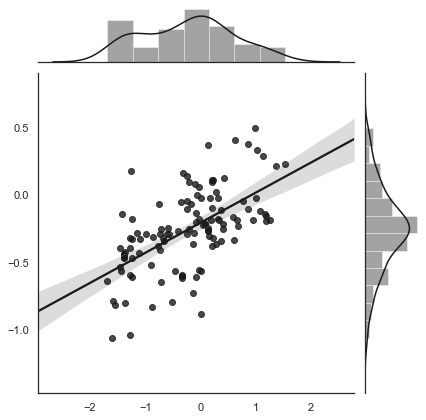

In [0]:
# Testing SVR on PC features.

X = cl0Array[:,:3]
y = cl0Array[:,3]
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=1)
svr = svm.SVR()
svr.fit(XTrain, yTrain)
yPred = svr.predict(XTest)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=yTest, y=yPred, kind="reg", color="k");

In [0]:
svr.score(XTest, yTest)

0.3054987732603194

In [0]:
# Building new dimensions from the existing PC dimensions using polynomial feature generator.

In [0]:
X = cl0Array[:,:3]
y = cl0Array[:,3]
poly = PolynomialFeatures( degree = 2, include_bias = False) 
XPoly = poly.fit_transform(X)

In [0]:
XPoly.shape

(386, 9)

In [0]:
# The final X and y data sets are ready for model building.

In [0]:
# Train, validation, test split

X1, cl0X_test, y1, cl0y_test = train_test_split(XPoly, y, test_size=0.20, random_state=1)
cl0X_train, cl0X_val, cl0y_train, cl0y_val = train_test_split(X1, y1, test_size=0.20, random_state=1)

### Support Vector Regression on training set

In [0]:
cl0M1 = svm.SVR()
cl0M1.fit(cl0X_train , cl0y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
cl0M1.score(cl0X_train, cl0y_train)

0.30755830544019047

### Decision Tree Regressor

In [0]:
cl0M2 = DecisionTreeRegressor(random_state=0, max_depth=3)

cl0M2.fit(cl0X_train , cl0y_train)
feature_importances = cl0M2.feature_importances_

print(feature_importances)

[0.1614824  0.         0.10170624 0.06328571 0.06545982 0.
 0.         0.20762043 0.40044539]


In [0]:
y_pred = cl0M2.predict(cl0X_test)

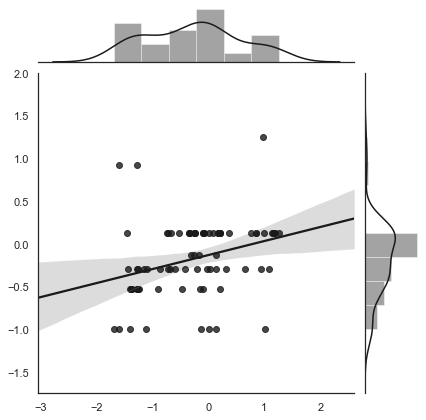

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=cl0y_test, y=y_pred, kind="reg", color="k");

In [0]:
cl0M2.score(cl0X_train, cl0y_train)

0.36703913764128304

### Regularized Linear Model 

In [0]:
cl0M3 = LinearRegression()
cl0M3.fit(cl0X_train, cl0y_train)

cl0M3.coef_

array([-0.16964805,  0.3185963 , -0.39556818, -0.04192537, -0.07107936,
        0.21117334, -0.24931039, -0.98663956, -0.8124118 ])

In [0]:
intercept = cl0M3.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.061555268819156295


In [0]:
cl0M3Ridge = Ridge(alpha=.3)
cl0M3Ridge.fit(cl0X_train, cl0y_train)
print ("Ridge model:", (cl0M3Ridge.coef_))

Ridge model: [-0.17123693  0.31831219 -0.38245394 -0.03872885 -0.06672322  0.20596336
 -0.23101495 -0.94672056 -0.79288599]


In [0]:
cl0M3Lasso = Lasso(alpha=0.1)
cl0M3Lasso.fit(cl0X_train, cl0y_train)
print ("Lasso model:", (cl0M3Lasso.coef_))

Lasso model: [-0.0674529   0.04484991 -0.          0.         -0.          0.
  0.         -0.         -0.        ]


In [0]:
print(cl0M3.score(cl0X_train, cl0y_train))

0.23745578750974083


In [0]:
print(cl0M3Ridge.score(cl0X_train, cl0y_train))

0.237333718532856


In [0]:
print(cl0M3Lasso.score(cl0X_train, cl0y_train))

0.04131467522698051


#### Cluster 0 performed very badly on all the algorithms. It means clustering did not help cluster 0 in any way.

### Cluster 1 

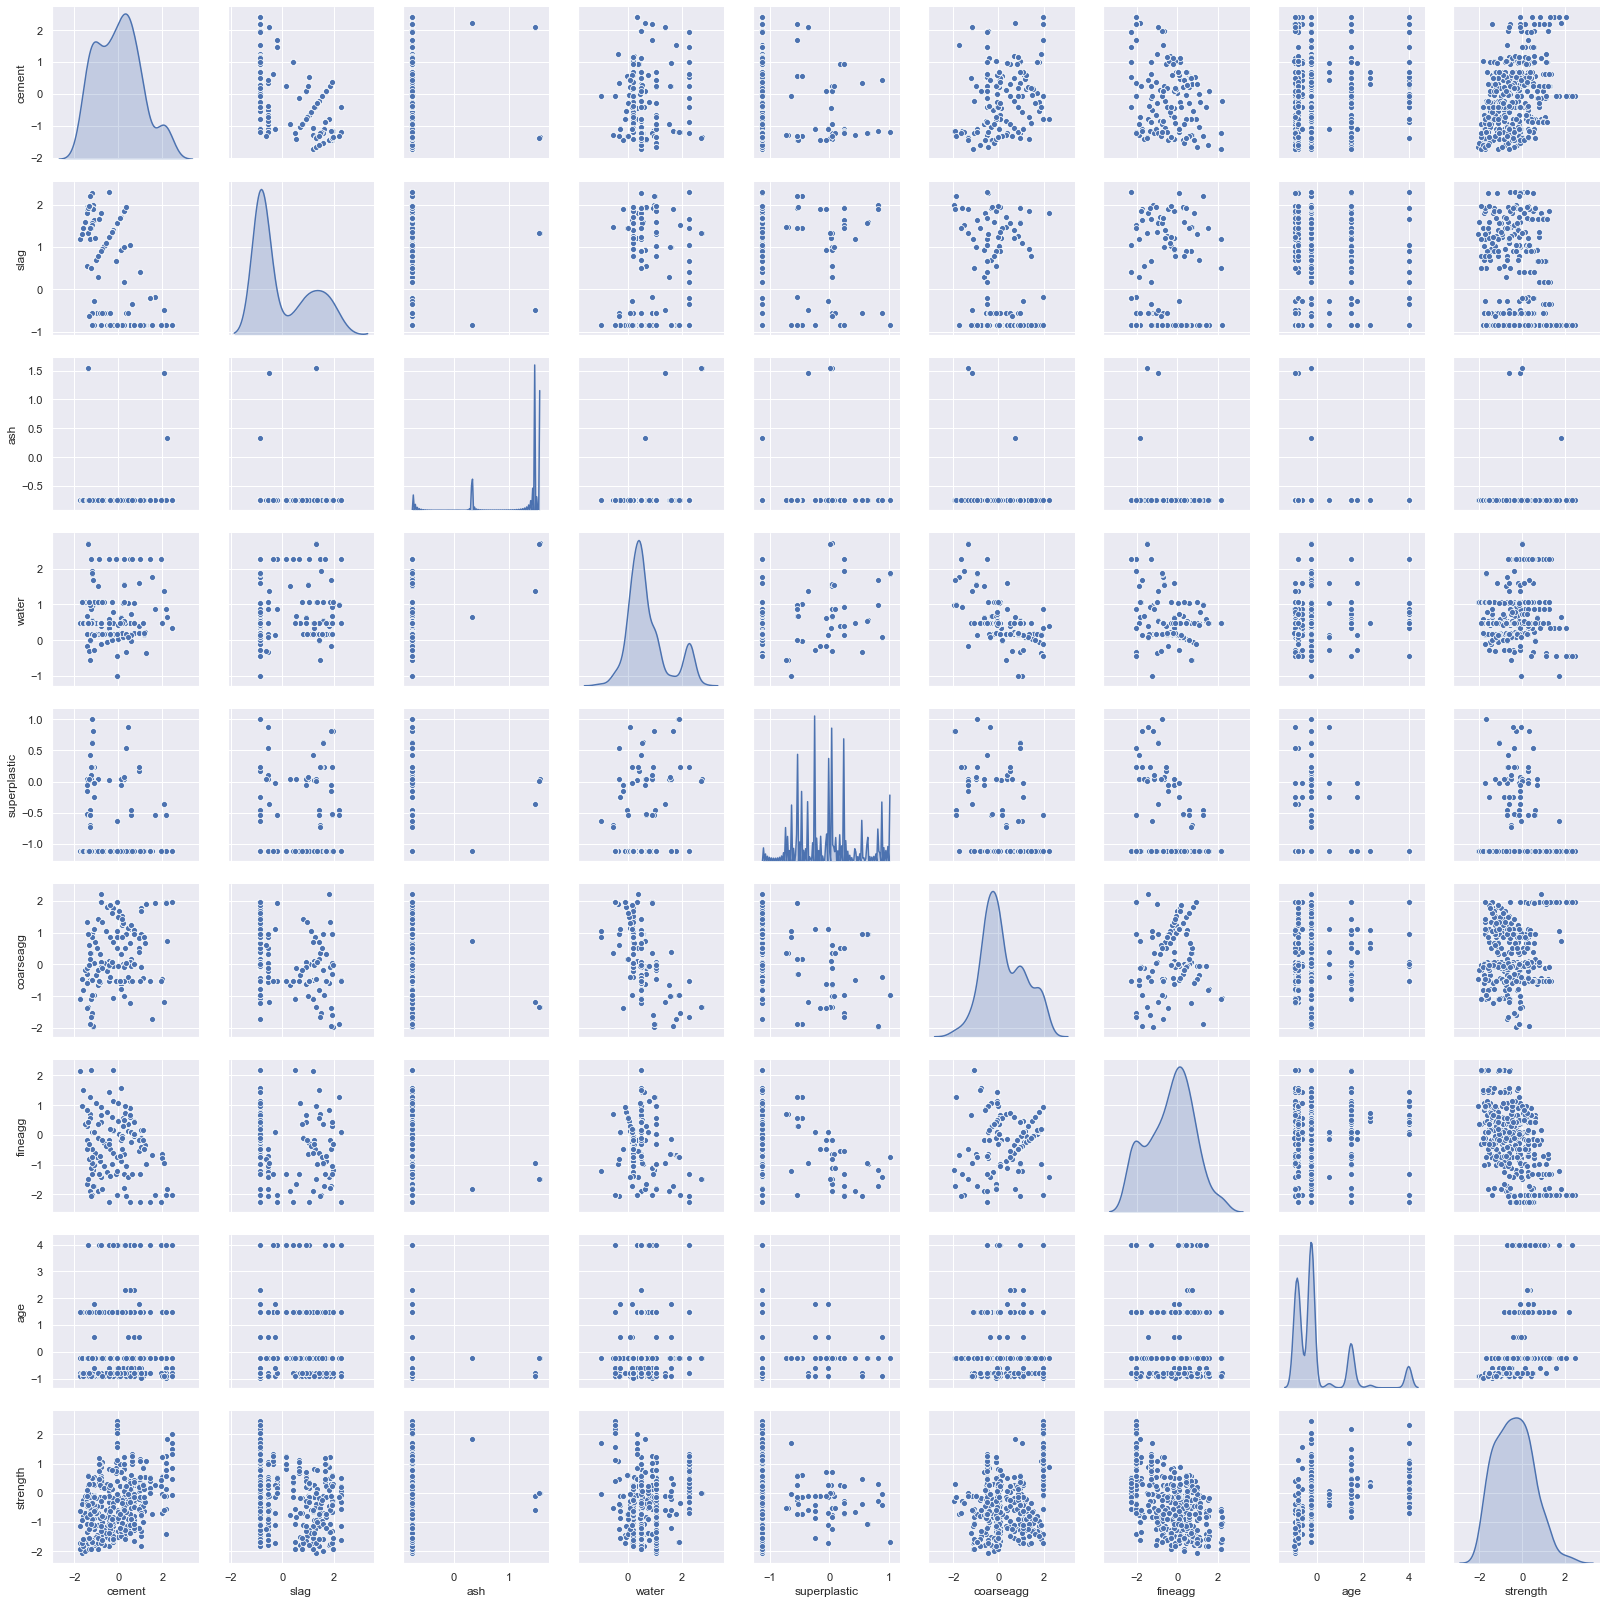

In [0]:
# Pair plot
sns.pairplot(cl1df, diag_kind='kde')

In [0]:
# Remove the non predicting features.
cols_to_drop = ["slag", "superplastic", "coarseagg"]
cl1df1 = cl1df.drop(cols_to_drop , axis = 1)

In [0]:
cl1df1.head()

cement       ash     water   fineagg       age  strength
0 -1.353800 -0.748166  1.055292 -0.305676 -0.223767 -0.331585
3 -0.126330 -0.748166  2.266262 -1.303578 -0.223767  0.678817
4 -1.220914 -0.748166  0.551134 -0.964165 -0.223767 -1.065962
5 -0.234607 -0.748166  0.486878  2.192258  1.490458 -0.839951
6 -1.102794 -0.748166  1.055292 -1.016284 -0.804392 -1.226765

In [0]:
# Now before handling the outliers, first perform a model test on this cluster.

In [0]:
X = cl1df1.drop('strength', axis=1)
y = cl1df1['strength']

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 1.02567608  0.01213896  0.10741133 -0.42317349  0.09995114]
 [ 0.01213896  0.04970672  0.0279906  -0.02314679 -0.01349398]
 [ 0.10741133  0.0279906   0.53753708 -0.36595161  0.20934531]
 [-0.42317349 -0.02314679 -0.36595161  1.2510673  -0.07273287]
 [ 0.09995114 -0.01349398  0.20934531 -0.07273287  1.57679881]]


In [0]:
X = X.values
y = y.values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
svr = svm.SVR()
svr.fit(XTrain, yTrain)
yPred = svr.predict(XTest)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


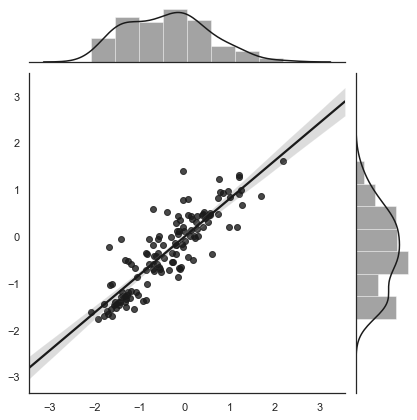

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=yTest, y=yPred, kind="reg", color="k");

In [0]:
svr.score(XTrain, yTrain)

0.8301332955098112

In [0]:
svr.score(XTest, yTest)

0.7514238926617975

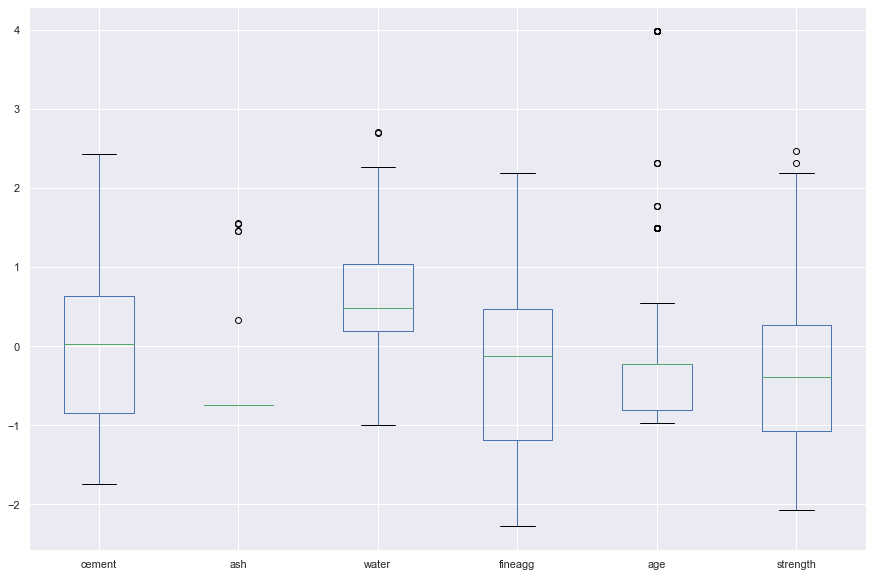

In [0]:
# Handle outliers in cluster 1

cl1df1.boxplot(figsize=(15,10))

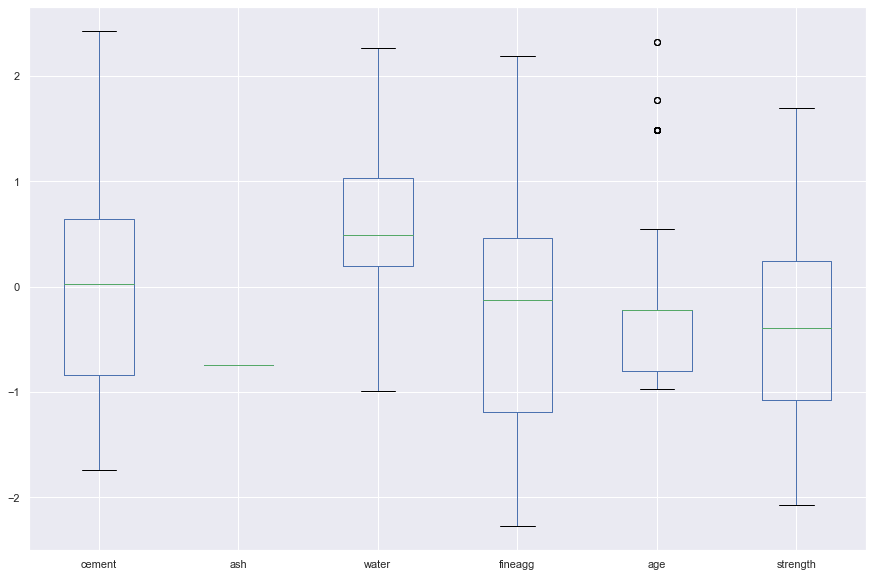

In [0]:
def handle(a):
    median, std = a.median(), a.std()  #Get the median and the standard deviation for each 'a'
    outliers = (a - median).abs() > 2.5*std # Subtract median from every member from each 'a'. Take absolute values > 2.5std
    a[outliers] = a.median()       
    return a

cl1df2 = cl1df1.transform(handle)
cl1df2.boxplot(figsize=(15, 10))

In [0]:
cl1df2.describe().transpose()

count      mean           std       min       25%       50%  \
cement    428.0  0.015815  1.012757e+00 -1.740645 -0.843667  0.021321   
ash       428.0 -0.748166  5.446459e-15 -0.748166 -0.748166 -0.748166   
water     428.0  0.706299  7.205438e-01 -0.995941  0.190314  0.486878   
fineagg   428.0 -0.298794  1.118511e+00 -2.269700 -1.189169 -0.128978   
age       428.0 -0.186364  7.653981e-01 -0.970285 -0.804392 -0.223767   
strength  428.0 -0.399489  8.302155e-01 -2.076364 -1.076091 -0.398375   

               75%       max  
cement    0.638993  2.423107  
ash      -0.748166 -0.748166  
water     1.030579  2.266262  
fineagg   0.463408  2.192258  
age      -0.223767  2.319922  
strength  0.245155  1.696183

In [0]:
# There is only one value for the column 'ash', thus removing it.
cl1df3 = cl1df2.drop('ash' , axis = 1)

In [0]:
cl1df3.head()

cement     water   fineagg       age  strength
0 -1.353800  1.055292 -0.305676 -0.223767 -0.331585
3 -0.126330  2.266262 -1.303578 -0.223767  0.678817
4 -1.220914  0.551134 -0.964165 -0.223767 -1.065962
5 -0.234607  0.486878  2.192258  1.490458 -0.839951
6 -1.102794  1.055292 -1.016284 -0.804392 -1.226765

In [0]:
X = cl1df3.drop('strength', axis = 1)
y = cl1df3['strength']

In [0]:
X = X.values
y = y.values

In [0]:
# Using Polynomial feature generator
poly = PolynomialFeatures( degree = 2, include_bias = False) 
XPoly = poly.fit_transform(X)

In [0]:
XPoly.shape

(428, 14)

In [0]:
# Train, validation, test split

X1, cl1X_test, y1, cl1y_test = train_test_split(XPoly, y, test_size=0.20, random_state=1)
cl1X_train, cl1X_val, cl1y_train, cl1y_val = train_test_split(X1, y1, test_size=0.20, random_state=1)

### Support Vector Regression 

In [0]:
cl1M1 = svm.SVR()
cl1M1.fit(cl1X_train , cl1y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
cl1M1.score(cl1X_train, cl1y_train)

0.8251552882050067

### Decision Tree Regressor

In [0]:
cl1M2 = DecisionTreeRegressor(random_state=0, max_depth=3)

cl1M2.fit(cl1X_train , cl1y_train)
feature_importances = cl1M2.feature_importances_

print(feature_importances)

[0.06243999 0.00786763 0.29209084 0.55316514 0.         0.
 0.05316872 0.03126769 0.         0.         0.         0.
 0.         0.        ]


In [0]:
cl1M2.score(cl1X_train, cl1y_train)

0.6998661893890111

### Regularized Linear Model

In [0]:
cl1M3 = LinearRegression()
cl1M3.fit(cl1X_train, cl1y_train)

cl1M3.coef_

array([ 0.2870076 , -0.22886556, -0.37407863,  0.98488295, -0.07300217,
       -0.12251183, -0.09299256, -0.05738103,  0.29511875,  0.24691019,
       -0.15201231, -0.02192666, -0.020973  , -0.40788168])

In [0]:
intercept = cl1M3.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.002956237881418855


In [0]:
cl1M3Ridge = Ridge(alpha=.3)
cl1M3Ridge.fit(cl1X_train, cl1y_train)
print ("Ridge model:", (cl1M3Ridge.coef_))

Ridge model: [ 0.28565097 -0.21991884 -0.37213467  0.97575766 -0.07226019 -0.12089765
 -0.0918839  -0.05753759  0.29026785  0.24430237 -0.14563436 -0.02174828
 -0.01857252 -0.40509693]


In [0]:
cl1M3Lasso = Lasso(alpha=0.1)
cl1M3Lasso.fit(cl1X_train, cl1y_train)
print ("Lasso model:", (cl1M3Lasso.coef_))

Lasso model: [ 0.13475497  0.         -0.19529517  0.35491093  0.          0.
 -0.         -0.          0.05630962 -0.          0.          0.
  0.         -0.        ]


In [0]:
print(cl1M3.score(cl1X_train, cl1y_train))

0.7125656322789061


In [0]:
print(cl1M3Ridge.score(cl1X_train, cl1y_train))

0.7125387330816676


In [0]:
print(cl1M3Lasso.score(cl1X_train, cl1y_train))

0.5200505109469977


### Support vector regressor performs the best for cluster 1. Other models perform average.

## Cluster 2

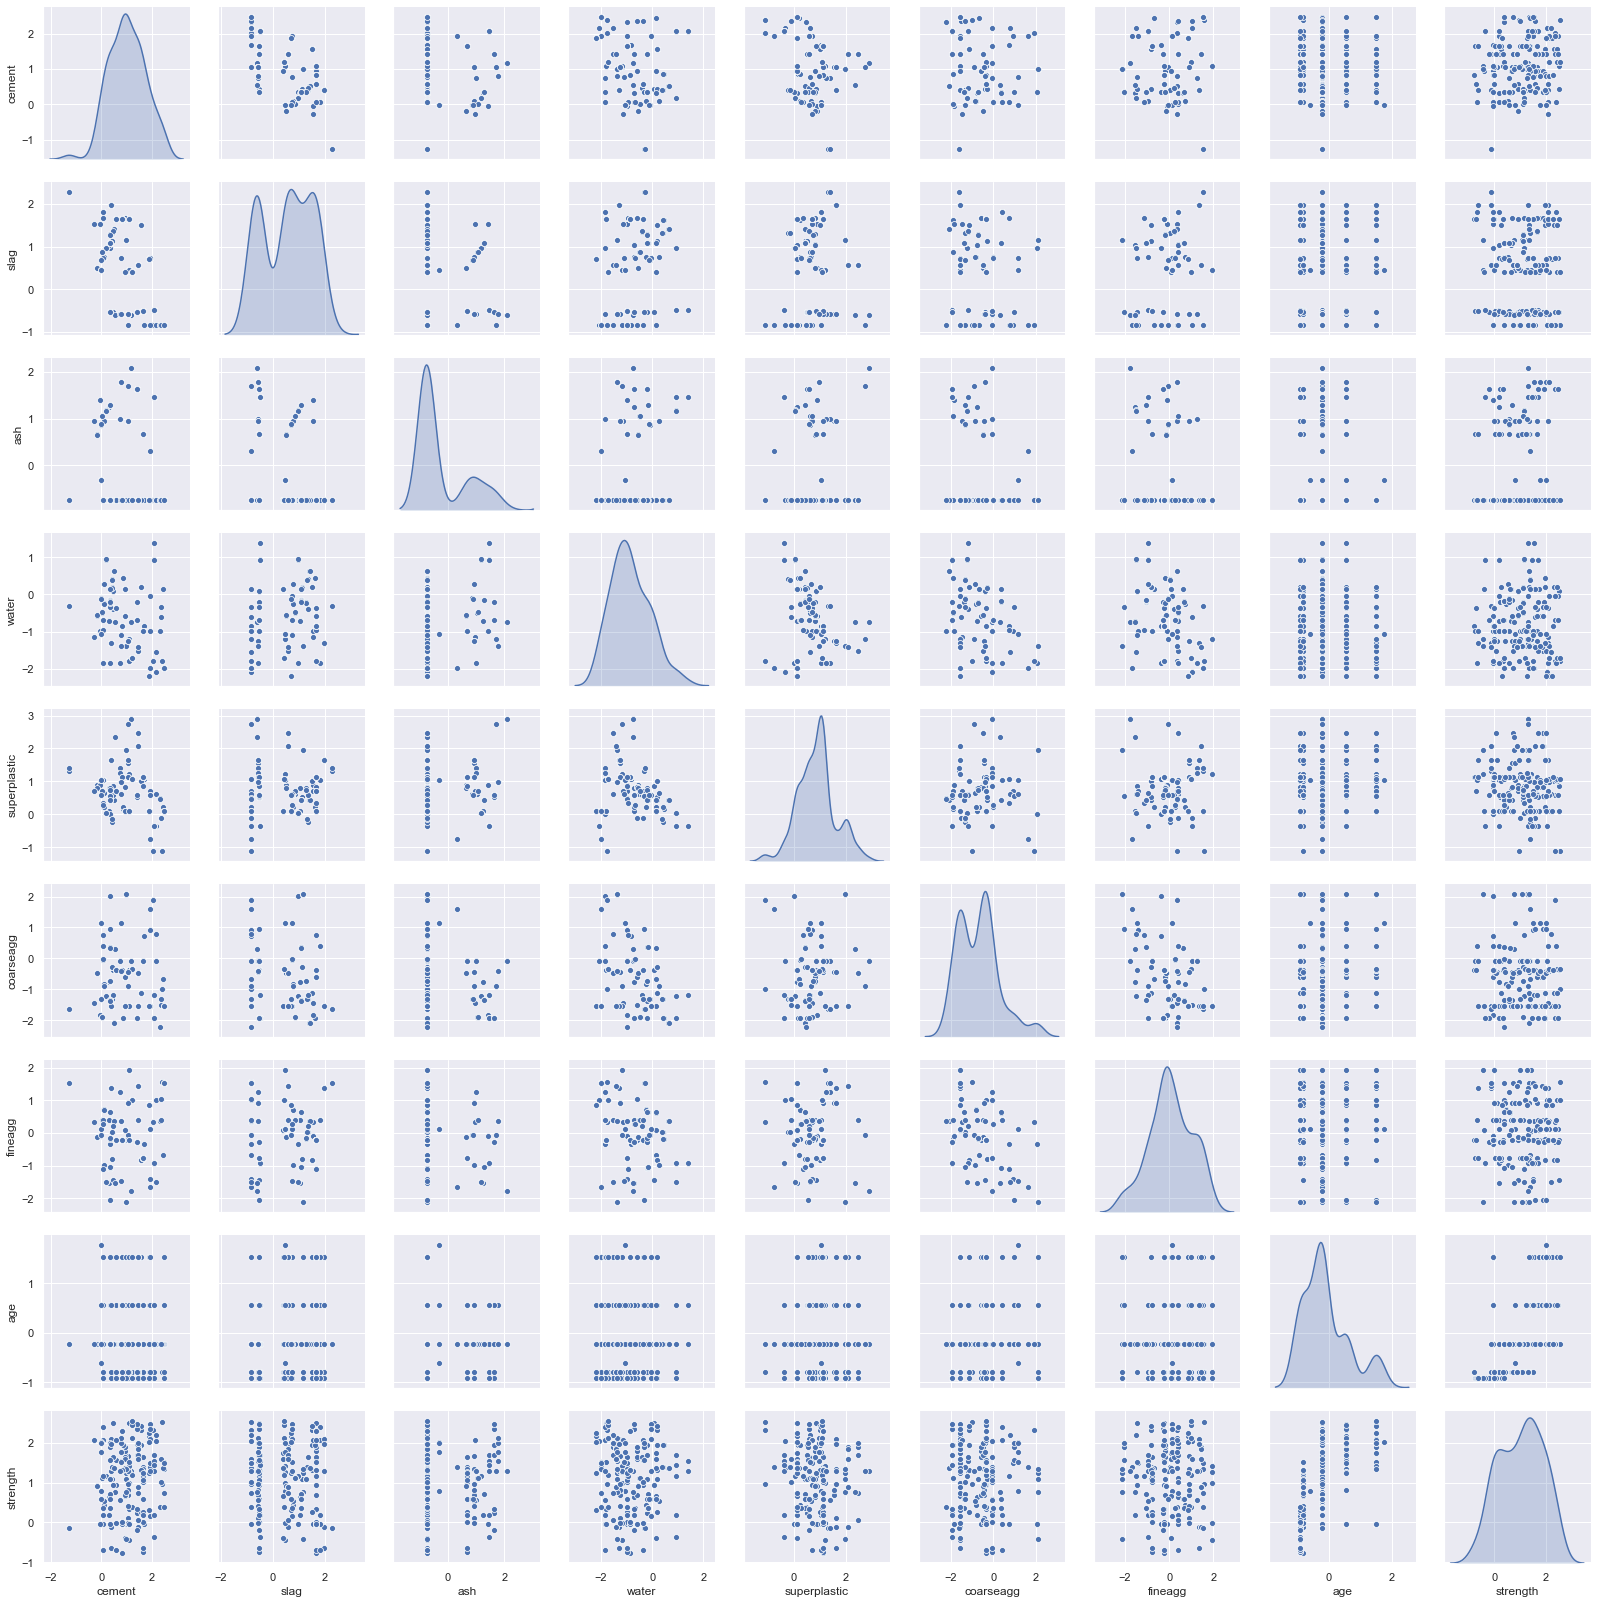

In [0]:
# Pair plot
sns.pairplot(cl2df, diag_kind='kde')

In [0]:
# Remove the non predicting features.
cols_to_drop = ["ash", "water", "coarseagg", "fineagg"]
cl2df1 = cl2df.drop(cols_to_drop , axis = 1)

In [0]:
cl2df1.head()

cement      slag  superplastic       age  strength
25  0.306779  1.048647      0.815519 -0.223767  0.643997
27  1.438769  0.563535      2.073125  1.518107  1.903834
33  0.336309  1.075083      0.428563 -0.223767  0.594617
37 -0.016084  0.451180      1.047692 -0.610851  0.796571
44  2.485121 -0.841569      0.118998  1.518107  1.523984

In [0]:
# Now before handling the outliers, first perform a model test on this cluster.

In [0]:
X = cl2df1.drop('strength', axis=1)
y = cl2df1['strength']

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix)

[[ 0.50143215 -0.37839533 -0.07105802 -0.01039727]
 [-0.37839533  0.86636637  0.08678695  0.04807608]
 [-0.07105802  0.08678695  0.52215392  0.0311762 ]
 [-0.01039727  0.04807608  0.0311762   0.52002969]]


In [0]:
X = X.values
y = y.values
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=1)

In [0]:
svr = svm.SVR()
svr.fit(XTrain, yTrain)
yPred = svr.predict(XTest)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


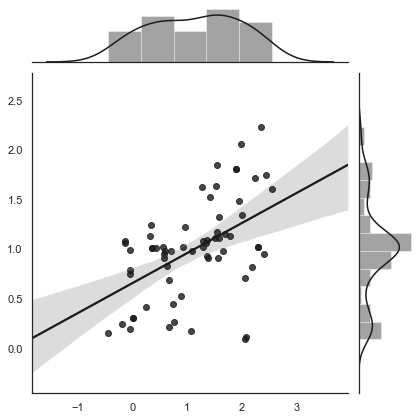

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=yTest, y=yPred, kind="reg", color="k");

In [0]:
svr.score(XTrain, yTrain)

0.5421588031968335

In [0]:
svr.score(XTest, yTest)

0.2095313246805389

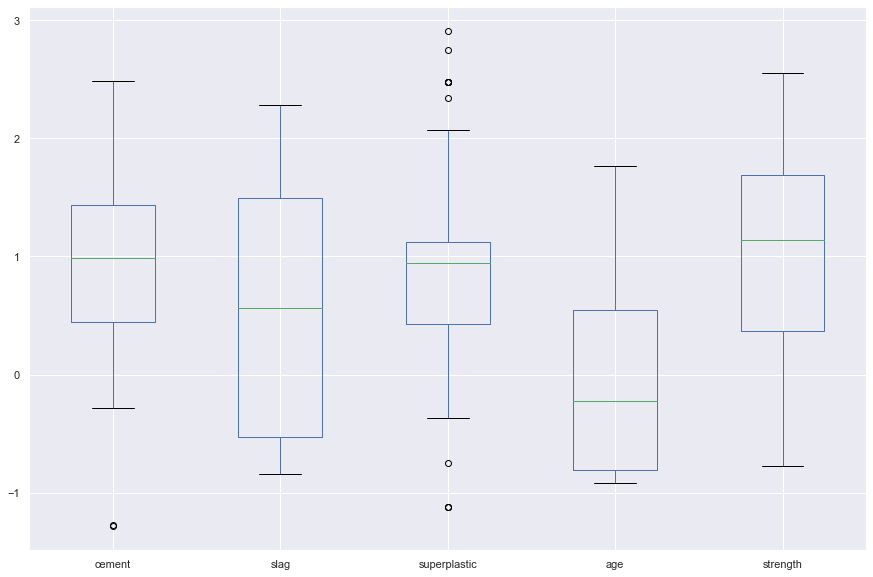

In [0]:
# Handle outliers in cluster 1

cl2df1.boxplot(figsize=(15,10))

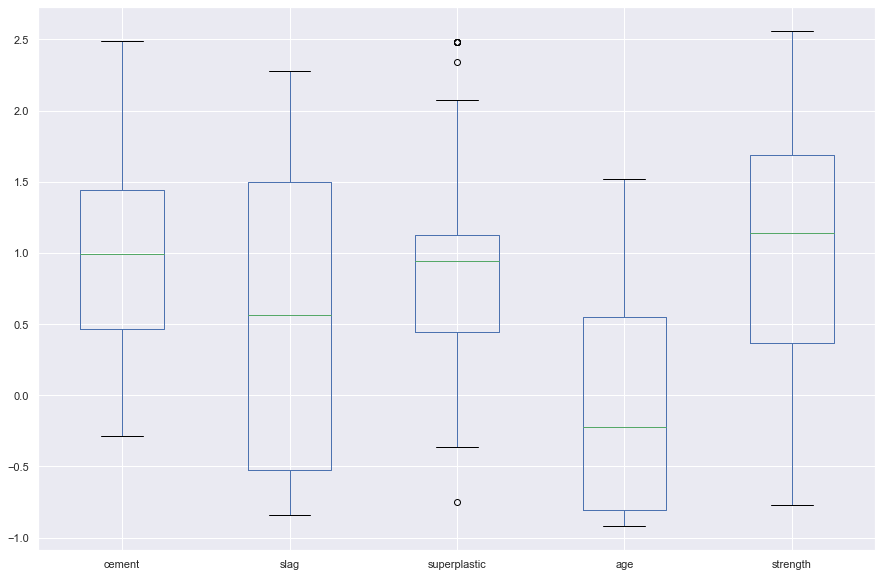

In [0]:
def handle(a):
    median, std = a.median(), a.std()  #Get the median and the standard deviation for each 'a'
    outliers = (a - median).abs() > 2.5*std # Subtract median from every member from each 'a'. Take absolute values > 2.5std
    a[outliers] = a.median()       
    return a

cl2df2 = cl2df1.transform(handle)
cl2df2.boxplot(figsize=(15, 10))

In [0]:
cl2df2.describe().transpose()

count      mean       std       min       25%       50%  \
cement        216.0  1.055569  0.671836 -0.283824  0.463289  0.990895   
slag          216.0  0.564814  0.930788 -0.841569 -0.524330  0.563535   
superplastic  216.0  0.902449  0.656313 -0.751652  0.443074  0.941279   
age           216.0 -0.091540  0.710022 -0.914987 -0.804392 -0.223767   
strength      216.0  1.042468  0.839227 -0.774110  0.367340  1.138436   

                   75%       max  
cement        1.438769  2.485121  
slag          1.498069  2.277948  
superplastic  1.125083  2.479429  
age           0.550399  1.518107  
strength      1.689536  2.555911

In [0]:
X = cl2df2.drop('strength', axis = 1)
y = cl2df2['strength']

In [0]:
X = X.values
y = y.values

In [0]:
# Using PCA

pca = PCA(n_components=4)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
# Eigen values
print(pca.explained_variance_)

[1.07146391 0.50602885 0.41876993 0.25634525]


In [0]:
# Eigen vectors
print(pca.components_)

[[ 0.48255529 -0.86417887 -0.1163666  -0.08242627]
 [ 0.13071302 -0.04670293  0.20217831  0.96946216]
 [ 0.07624377 -0.06757688  0.97105333 -0.21604558]
 [-0.86269426 -0.49643437  0.05136325  0.08169055]]


In [0]:
# Percentage of variation explained by each eigen vector.
print(pca.explained_variance_ratio_)

[0.47565486 0.22464133 0.18590449 0.11379932]


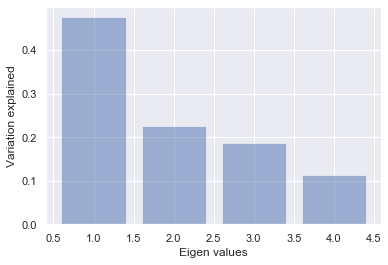

In [0]:
plt.bar(list(range(1,5)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen values')
plt.show()

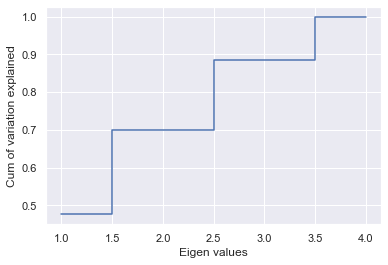

In [0]:
plt.step(list(range(1,5)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen values')
plt.show()

In [0]:
pcaNew = PCA(n_components=3) # Using 3 components
pcaNew.fit(X)
print(pcaNew.components_)
print(pcaNew.explained_variance_ratio_)
XpcaNew = pcaNew.transform(X)

[[ 0.48255529 -0.86417887 -0.1163666  -0.08242627]
 [ 0.13071302 -0.04670293  0.20217831  0.96946216]
 [ 0.07624377 -0.06757688  0.97105333 -0.21604558]]
[0.47565486 0.22464133 0.18590449]


In [0]:
y = y.reshape(y.size, 1)

In [0]:
# The 3 new dimensions are covering around 90% of the variance.

In [0]:
cl2Array = np.concatenate((XpcaNew, y), axis=1)

In [0]:
cl2df3 = pd.DataFrame(cl2Array, columns = ['PCA0', 'PCA1', 'PCA2', 'strength'])

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


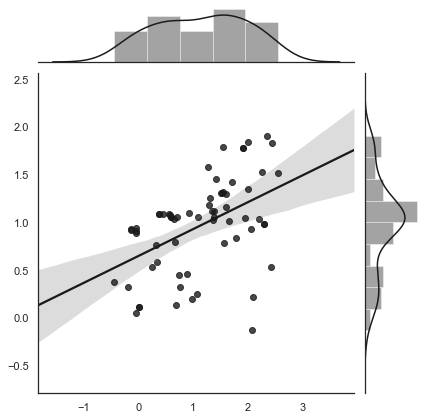

In [0]:
# Testing SVR on PC features.

X = cl2Array[:,:3]
y = cl2Array[:,3]
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=1)
svr = svm.SVR()
svr.fit(XTrain, yTrain)
yPred = svr.predict(XTest)
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=yTest, y=yPred, kind="reg", color="k");

In [0]:
svr.score(XTrain, yTrain)

0.49755602006245553

In [0]:
svr.score(XTest, yTest)

0.16415850482351746

In [0]:
# As PCA did not help in any way, it is better to use the cluster without PCA.
# So, using cl2df2 data set.

In [0]:
X = cl2df2.drop('strength', axis = 1)
y = cl2df2['strength']

X = X.values
y = y.values

In [0]:
# Train, validation, test split

X1, cl2X_test, y1, cl2y_test = train_test_split(X, y, test_size=0.20, random_state=1)
cl2X_train, cl2X_val, cl2y_train, cl2y_val = train_test_split(X1, y1, test_size=0.20, random_state=1)

### Support Vector Regression on training set

In [0]:
cl2M1 = svm.SVR()
cl2M1.fit(cl2X_train , cl2y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
cl2M1.score(cl2X_train, cl2y_train)

0.4877351813712332

### Decision Tree Regressor

In [0]:
cl2M2 = DecisionTreeRegressor(random_state=0, max_depth=3)

cl2M2.fit(cl2X_train , cl2y_train)
feature_importances = cl2M2.feature_importances_

print(feature_importances)

[0.17375184 0.05889193 0.03439505 0.73296118]


In [0]:
cl2M2.score(cl2X_train, cl2y_train)

0.5489880986460367

### Regularized Linear Model

In [0]:
cl2M3 = LinearRegression()
cl2M3.fit(cl2X_train, cl2y_train)

cl2M3.coef_

array([ 0.07447866, -0.1231602 , -0.07012113,  0.51175197])

In [0]:
intercept = cl2M3.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1.1325150789008958


In [0]:
cl2M3Ridge = Ridge(alpha=.3)
cl2M3Ridge.fit(cl2X_train, cl2y_train)
print ("Ridge model:", (cl2M3Ridge.coef_))

Ridge model: [ 0.07426747 -0.12281347 -0.06990659  0.50939224]


In [0]:
cl2M3Lasso = Lasso(alpha=0.1)
cl2M3Lasso.fit(cl2X_train, cl2y_train)
print ("Lasso model:", (cl2M3Lasso.coef_))

Lasso model: [ 0.         -0.03464149 -0.          0.29010323]


In [0]:
print(cl2M3.score(cl2X_train, cl2y_train))

0.18874452812185605


In [0]:
print(cl2M3Ridge.score(cl2X_train, cl2y_train))

0.18874088061745686


In [0]:
print(cl2M3Lasso.score(cl2X_train, cl2y_train))

0.13785983283290082


#### Decision Tree Regressor performs better than the rest for cluster 2.

In [0]:
# Comparing all the scores performed for the different datasets.

# Score without clustering: 
    # 0.782628116213679 (on training set)
    # 0.8338608931198951 (on test set)
    # dataset: df2newScaled

# Scores for cluster 0:

    # SVR:
        # dataset: cl0df2
        # 0.6094554492221225 (on training set)
        # 0.4934547377344072 (on test set)
    
    # SVR with PCA:
        # dataset: cl0Array
        # 0.26700460430518225 (on training set)
        # 0.3054987732603194 (on test set)
    
    # Train, Val, Test: cl0X_train/val/test, cl0y_train/val/test
    
    # SVR With PCA with Polynomial features:
        # 0.30755830544019047 (on training set)
        
    # Decision Tree regressor With PCA with Polynomial features:
        # 0.36703913764128304 (on training set)
        
    # Regulaized Linear regression With PCA with Polynomial features: 
        # Linear model: 0.23745578750974083 (on training set)
        # Ridge: 0.237333718532856 (on training set)
        # Lasso: 0.04131467522698051 (on training set)

# Scores for cluster 1:
    # SVR:
        # dataset: cl1df1
        # 0.8301332955098112 (on training set)
        # 0.7514238926617975 (on test set)
    
    # Train, Val, Test: cl1X_train/val/test, cl1y_train/val/test
    
    # SVR with Polynomial features:
        # 0.8251552882050067 (on training set)
        
    # Decision Tree regressor with Polynomial features:
        # 0.6998661893890111 (on training set)
        
    # Regulaized Linear regression with Polynomial features: 
        # Linear model: 0.7125656322789061 (on training set)
        # Ridge: 0.7125387330816676 (on training set)
        # Lasso: 0.5200505109469977 (on training set)
        
# Scores for cluster 2:
    # SVR with outliers:
        # dataset: cl2df1
        # 0.5421588031968335 (on training set)
        # 0.2095313246805389 (on test set)
        
    # SVR with PCA:
        # dataset: cl2Array
        # 0.49755602006245553 (on training set)
        # 0.16415850482351746 (on test set)
    
    # Train, Val, Test: cl2X_train/val/test, cl2y_train/val/test
    
    # SVR without PCA without any outliers:
        # 0.4877351813712332 (on training set)
        
    # Decision Tree regressor without PCA without any outliers:
        # 0.5489880986460367 (on training set)
        
    # Regulaized Linear regression without PCA without any outliers: 
        # Linear model: 0.18874452812185605 (on training set)
        # Ridge: 0.18874088061745686 (on training set)
        # Lasso: 0.13785983283290082 (on training set)


In [0]:
# Taking suitable algorithms.

# SVR on data without clusters.
# SVR without PCA, without polynomial features for cluster 0.
# SVR with polynomial features for cluster 1.
# Decision Tree Regressor without PCA for cluster 2.

## Tuning the Models

### SVR on data without clusters (Original Scores: 0.78 on training set, 0.83 on test set)

In [0]:
df2newScaled.head()

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.353800  1.960709 -0.748166  1.055292     -1.119260  -0.014398 -0.305676   
1 -1.082123 -0.283757  1.484068 -1.178822      0.970301   1.388141  0.300692   
2 -0.283824 -0.841569  0.970456  0.259513     -0.055132  -0.206121  1.126981   
3 -0.126330  0.665316 -0.748166  2.266262     -1.119260  -0.526517 -1.303578   
4 -1.220914  1.582666 -0.748166  0.551134      0.641389   0.958372 -0.964165   

        age  strength  
0 -0.223767 -0.331585  
1 -0.610851 -0.735492  
2 -0.223767 -0.374001  
3 -0.223767  0.678817  
4 -0.223767 -1.065962

In [0]:
df2newScaled.shape

(1030, 9)

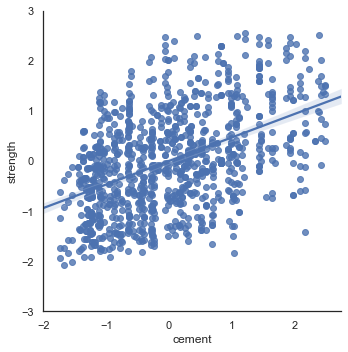

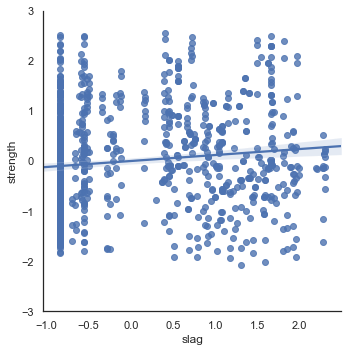

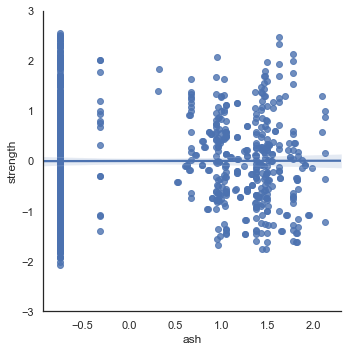

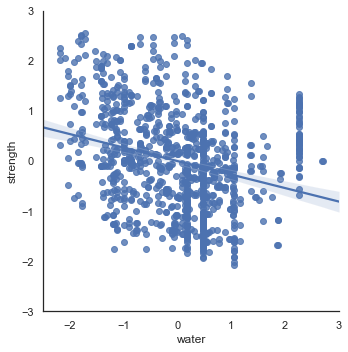

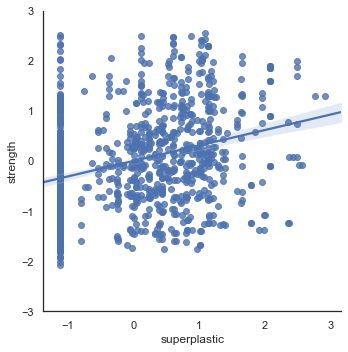

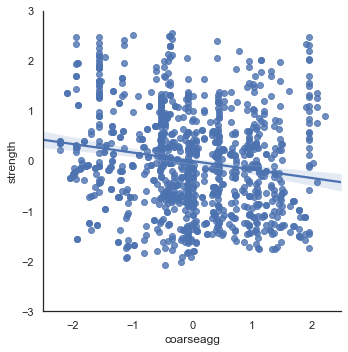

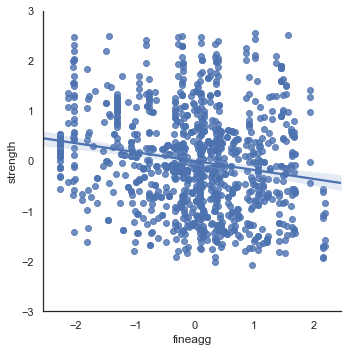

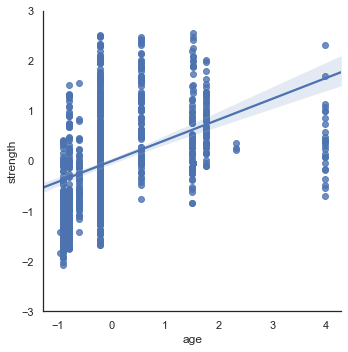

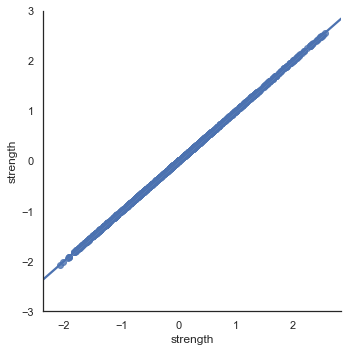

In [0]:
for dimension in df2newScaled.columns:
    with sns.axes_style("white"):
        plot = sns.lmplot(dimension,'strength',data=df2newScaled)
    plot.set(ylim = (-3,3))

In [0]:
# Dropping the column 'ash'.

df2newScaled1 = df2newScaled.drop('ash', axis=1)

In [0]:
df2newScaled1

cement      slag     water  superplastic  coarseagg   fineagg  \
0    -1.353800  1.960709  1.055292     -1.119260  -0.014398 -0.305676   
1    -1.082123 -0.283757 -1.178822      0.970301   1.388141  0.300692   
2    -0.283824 -0.841569  0.259513     -0.055132  -0.206121  1.126981   
3    -0.126330  0.665316  2.266262     -1.119260  -0.526517 -1.303578   
4    -1.220914  1.582666  0.551134      0.641389   0.958372 -0.964165   
...        ...       ...       ...           ...        ...       ...   
1025 -1.415813 -0.841569 -0.106250      0.815519  -0.153365  0.412559   
1026  2.485121 -0.841569 -1.994373      0.118998  -1.554617  1.540125   
1027 -0.023959  0.691753 -0.126020      0.602693  -1.323005 -0.053976   
1028  0.621768 -0.339274  2.266262     -1.119260  -0.526517 -1.303578   
1029 -0.058410 -0.841569 -0.452241     -1.119260   1.956877 -2.028170   

           age  strength  
0    -0.223767 -0.331585  
1    -0.610851 -0.735492  
2    -0.223767 -0.374001  
3    -0.223767  0.678817  
4    -0.223767 -1.065962  
...        ...       ...  
1025 -0.223767 -1.382504  
1026 -0.914987  0.390764  
1027 -0.223767  0.579423  
1028 -0.223767  1.261887  
1029 -0.804392  1.106782  

[1030 rows x 8 columns]

In [0]:
model1data = df2newScaled1.values
X = model1data[:,:7]
y = model1data[:,7]

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix) #Covariance matrix for features

[[ 1.00097182 -0.21769478 -0.07503669  0.00567867 -0.1524453  -0.2031209
   0.02142785]
 [-0.21769478  1.00097182  0.09159478  0.08292212 -0.33245387 -0.17459131
  -0.02689337]
 [-0.07503669  0.09159478  1.00097182 -0.63258379 -0.1864391  -0.43698847
   0.09967955]
 [ 0.00567867  0.08292212 -0.63258379  1.00097182 -0.20338685  0.1768172
  -0.07166188]
 [-0.1524453  -0.33245387 -0.1864391  -0.20338685  1.00097182 -0.16153401
   0.02344236]
 [-0.2031209  -0.17459131 -0.43698847  0.1768172  -0.16153401  1.00097182
  -0.02395555]
 [ 0.02142785 -0.02689337  0.09967955 -0.07166188  0.02344236 -0.02395555
   1.00097182]]


In [0]:
# Train, validation, test split

X1, m1X_test, y1, m1y_test = train_test_split(X, y, test_size=0.20, random_state=1)
m1X_train, m1X_val, m1y_train, m1y_val = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [0]:
model1 = svm.SVR()
model1.fit(m1X_train , m1y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model1.score(m1X_train, m1y_train)

0.8441316494804686

In [0]:
param_grid = { 'kernel': ('linear', 'poly', 'rbf' , 'sigmoid'), 'gamma': ('auto', 'scale') }

In [0]:
gs = GridSearchCV(model1,param_grid, cv=10)

In [0]:
gs.fit(m1X_val, m1y_val) #on validation set

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
gs.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [0]:
gs.cv_results_['params']

[{'gamma': 'auto', 'kernel': 'linear'},
 {'gamma': 'auto', 'kernel': 'poly'},
 {'gamma': 'auto', 'kernel': 'rbf'},
 {'gamma': 'auto', 'kernel': 'sigmoid'},
 {'gamma': 'scale', 'kernel': 'linear'},
 {'gamma': 'scale', 'kernel': 'poly'},
 {'gamma': 'scale', 'kernel': 'rbf'},
 {'gamma': 'scale', 'kernel': 'sigmoid'}]

In [0]:
gs.cv_results_['mean_test_score']

array([ 0.43677424,  0.37516604,  0.59886168, -1.03419805,  0.43677424,
        0.36764419,  0.6006454 , -1.14688974])

In [0]:
gs.score(m1X_val, m1y_val)

0.843390514430693

In [0]:
#K-Fold Cross Validations on Test set

kfold = KFold(n_splits=10, random_state=7)
m1results = cross_val_score(gs, m1X_test, m1y_test, cv=kfold)
#print(m1results)
print("Accuracy: %.3f%% (%.3f%%)" % (m1results.mean()*100.0, m1results.std()*100.0))

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Depreca

Accuracy: 71.105% (16.745%)


C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Model 1 Performance range: 71.12% [16.757% deviation] (Range: 54.363% to 87.877% for 95% confidence level)

## SVR without PCA, without polynomial features for Cluster 0 (Original Scores: 0.609 on training set, 0.49 on test set)

In [0]:
cl0df2.head()

cement     water  superplastic       age  strength
1  -1.082123 -1.178822      0.970301 -0.610851 -0.735492
2  -0.283824  0.259513     -0.055132 -0.223767 -0.374001
7  -0.270043  0.313883      0.118998  0.550399  0.095747
9  -1.218946  0.585733      0.622041 -0.223767 -0.388562
10 -1.250445 -0.724091      0.563997 -0.223767  0.077387

In [0]:
cl0df2.shape

(386, 5)

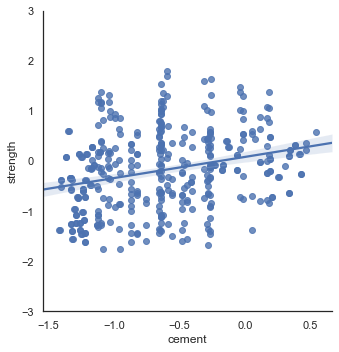

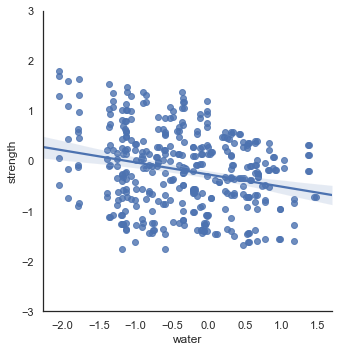

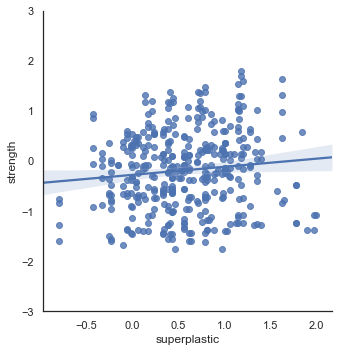

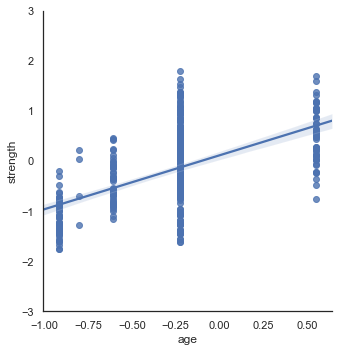

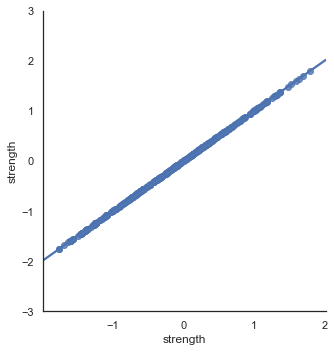

In [0]:
for dimension in cl0df2.columns:
    with sns.axes_style("white"):
        plot = sns.lmplot(dimension,'strength',data=cl0df2)
    plot.set(ylim = (-3,3))

In [0]:
model2data = cl0df2.values
X = model2data[:,:4]
y = model2data[:,4]

In [0]:
covMatrix = np.cov(X,rowvar=False)
print(covMatrix) #Covariance matrix for features

[[ 0.24448227  0.03572461 -0.00341837 -0.00328682]
 [ 0.03572461  0.63216115 -0.20851035  0.01943454]
 [-0.00341837 -0.20851035  0.27489926 -0.00200096]
 [-0.00328682  0.01943454 -0.00200096  0.16657468]]


In [0]:
# Train, validation, test split

X1, m2X_test, y1, m2y_test = train_test_split(X, y, test_size=0.20, random_state=1)
m2X_train, m2X_val, m2y_train, m2y_val = train_test_split(X1, y1, test_size=0.20, random_state=1)

In [0]:
model2 = svm.SVR()
model2.fit(m2X_train , m2y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model2.score(m2X_train, m2y_train)

0.641983634499119

In [0]:
param_grid = { 'kernel': ('linear', 'poly', 'rbf' , 'sigmoid'), 'gamma': ('auto', 'scale') }

In [0]:
gs = GridSearchCV(model2,param_grid, cv=20)

In [0]:
gs.fit(m2X_val, m2y_val) #on validation set

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
gs.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [0]:
gs.cv_results_['params']

[{'gamma': 'auto', 'kernel': 'linear'},
 {'gamma': 'auto', 'kernel': 'poly'},
 {'gamma': 'auto', 'kernel': 'rbf'},
 {'gamma': 'auto', 'kernel': 'sigmoid'},
 {'gamma': 'scale', 'kernel': 'linear'},
 {'gamma': 'scale', 'kernel': 'poly'},
 {'gamma': 'scale', 'kernel': 'rbf'},
 {'gamma': 'scale', 'kernel': 'sigmoid'}]

In [0]:
gs.cv_results_['mean_test_score']

array([ -2.15842983,  -3.0409382 ,  -2.32772841,  -2.278237  ,
        -2.15842983,  -3.91647315,  -2.01635537, -11.46542817])

In [0]:
gs.score(m2X_val, m2y_val)

0.5270735754436817

In [0]:
#K-Fold Cross Validations on Test set

kfold = KFold(n_splits=10, random_state=7)
m2results = cross_val_score(gs, m2X_test, m2y_test, cv=kfold)
#print(m1results)
print("Accuracy: %.3f%% (%.3f%%)" % (m2results.mean()*100.0, m2results.std()*100.0))

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Depreca

Accuracy: 13.674% (52.250%)


C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Model 2 Performance range: 13.674% [52.250% deviation] (Range: 0% to 66%)

## SVR with polynomial features for Cluster 1 (Original Score: 0.82)

In [0]:
# Train, Val, Test: cl1X_train/val/test, cl1y_train/val/test

In [0]:
model3 = svm.SVR()
model3.fit(cl1X_train , cl1y_train)

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
model3.score(cl1X_train, cl1y_train)

0.8251552882050067

In [0]:
param_grid = { 'kernel': ('linear', 'poly', 'rbf' , 'sigmoid'), 'gamma': ('auto', 'scale') }

In [0]:
gs = GridSearchCV(model3,param_grid, cv=10)

In [0]:
gs.fit(cl1X_val, cl1y_val) #on validation set

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
gs.best_params_

{'gamma': 'auto', 'kernel': 'linear'}

In [0]:
gs.cv_results_['params']

[{'gamma': 'auto', 'kernel': 'linear'},
 {'gamma': 'auto', 'kernel': 'poly'},
 {'gamma': 'auto', 'kernel': 'rbf'},
 {'gamma': 'auto', 'kernel': 'sigmoid'},
 {'gamma': 'scale', 'kernel': 'linear'},
 {'gamma': 'scale', 'kernel': 'poly'},
 {'gamma': 'scale', 'kernel': 'rbf'},
 {'gamma': 'scale', 'kernel': 'sigmoid'}]

In [0]:
gs.cv_results_['mean_test_score']

array([ 0.48816164, -0.56847451,  0.46034586, -6.16178757,  0.48816164,
       -0.05122078,  0.46228264, -1.89489347])

In [0]:
gs.score(cl1X_val, cl1y_val)

0.6771043558534331

In [0]:
#K-Fold Cross Validations on Test set

kfold = KFold(n_splits=10, random_state=7)
m3results = cross_val_score(gs, cl1X_test, cl1y_test, cv=kfold)
#print(m1results)
print("Accuracy: %.3f%% (%.3f%%)" % (m3results.mean()*100.0, m3results.std()*100.0))

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: Depreca

Accuracy: 46.065% (31.774%)


### Model 3 Performance range: 46.065% [31.774% deviation] (Range: 15% to 78% for 95% confidence level)

## Decision Tree Regressor without PCA for Cluster 2 (Original Score: 0.54)

In [0]:
# Train, Val, Test: cl2X_train/val/test, cl2y_train/val/test

In [0]:
cl2X_train.shape

(137, 4)

In [0]:
model4 = DecisionTreeRegressor(random_state=0, max_depth=3)

model4.fit(cl2X_train , cl2y_train)
feature_importances = model4.feature_importances_

print(feature_importances)

[0.17375184 0.05889193 0.03439505 0.73296118]


In [0]:
y_pred = model4.predict(cl2X_test)

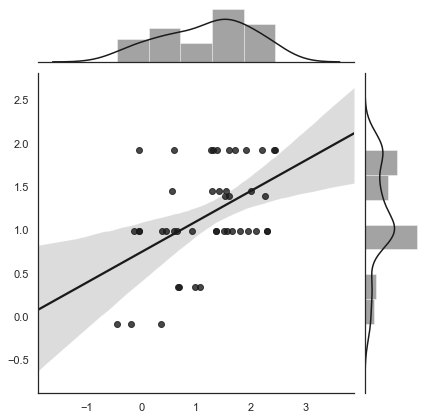

In [0]:
sns.set(style="darkgrid", color_codes=True)
with sns.axes_style("white"):
    sns.jointplot(x=cl2y_test, y=y_pred, kind="reg", color="k");

In [0]:
model4.score(cl2X_train, cl2y_train)

0.5489880986460367

In [0]:
param_grid = {"max_depth": [3, None],
              "max_features": [1, 4],
              "min_samples_split": [2, 4],
              "min_samples_leaf": [1, 4]}

In [0]:
gs = GridSearchCV(model4,param_grid, cv=10)

In [0]:
gs.fit(cl2X_val, cl2y_val) #on validation set

C:\Users\Sudhir\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=3,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, None], 'max_features': [1, 4],
                         'min_samples_leaf': [1, 4],
                         'min_samples_split': [2, 4]},
             pre_dispatch='2*n_jobs'

In [0]:
gs.best_params_

{'max_depth': 3,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [0]:
gs.cv_results_['params']

[{'max_depth': 3,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 4},
 {'max_depth': 3,
  'max_features': 1,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_features': 1,
  'min_samples_leaf': 4,
  'min_samples_split': 4},
 {'max_depth': 3,
  'max_features': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_features': 4,
  'min_samples_leaf': 1,
  'min_samples_split': 4},
 {'max_depth': 3,
  'max_features': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 2},
 {'max_depth': 3,
  'max_features': 4,
  'min_samples_leaf': 4,
  'min_samples_split': 4},
 {'max_depth': None,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 2},
 {'max_depth': None,
  'max_features': 1,
  'min_samples_leaf': 1,
  'min_samples_split': 4},
 {'max_depth': None,
  'max_features': 1,
  'min_samples_leaf': 4,
  'min_samples_sp

In [0]:
gs.cv_results_['mean_test_score']

array([-4.90873606, -5.18161308, -3.58517087, -3.58517087, -1.24314849,
       -1.09998502, -1.77531501, -1.77531501, -5.00702783, -7.18469029,
       -3.50957733, -3.50957733, -1.82241431, -1.69132136, -1.68297125,
       -1.68297125])

In [0]:
gs.score(cl2X_val, cl2y_val)

0.7656150758624065

### Model 4 Performance: 76.5%

In [0]:
#Observations

#1. The original data set read from csv, though does not have any data pollution, or missing values in its values,
# the relationships between the independent features and the target variable are not strong enough to predict the strength.

#2. Almost all features are having values which are scattered like a cloud. Though, the features have weak relationships
# between themselves, which is a good sign, the features are not having a normal distribution themselves.

#3. Clustering did help for a single cluster but did not help for the others.

#4. Overall the predication has been average with much variations in the accuracies of models.

#Suggestions

#1. Domain knowledge might be much needed for this project, so some knowledge on this scenario might improve the models.

#2. There should be more instances/records in the dataset as this could make some features more clear.